# Inferential EDA - Timely & Effective Hospital Care 2017-18

##  First Imports, Loading Data, and Taking a Peak into our Data

In [1]:
import itertools
import contextily as cx
import numpy as np
import pandas as pd 
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from numbers import Number
import sqlite3
from scipy import stats
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl
warnings.filterwarnings('ignore')
import pickle

In [2]:
#https://www.kaggle.com/datasets/rrartwork/timely-efective-hospital-care-201718
df = pd.read_csv('Timely_and_Effective_Care_-_Hospital.csv')
df[df['State']=='CA']

Facility ID                                      Facility Name  \
17           50280                       MERCY MEDICAL CENTER REDDING   
22           50488                                EDEN MEDICAL CENTER   
26           50077                             SCRIPPS MERCY HOSPITAL   
40           50407                                   CHINESE HOSPITAL   
106          50498                       SUTTER AUBURN FAITH HOSPITAL   
...            ...                                                ...   
90327        50348         UNIVERSITY OF CALIFORNIA IRVINE MED CENTER   
90329        50723          KAISER FOUNDATION HOSPITAL - BALDWIN PARK   
90333        50055  CALIFORNIA PACIFIC MEDICAL CENTER - MISSION BE...   
90337        50776                             COLLEGE MEDICAL CENTER   
90373        50301                      ADVENTIST HEALTH UKIAH VALLEY   

                                 Address           City State  ZIP Code  \
17     2175 ROSALINE AVE, CLAIRMONT HGTS        REDDING    CA     96001   
22                20103 LAKE CHABOT ROAD  CASTRO VALLEY    CA     94546   
26                          4077 5TH AVE      SAN DIEGO    CA     92103   
40                        845 JACKSON ST  SAN FRANCISCO    CA     94133   
106               11815 EDUCATION STREET         AUBURN    CA     95603   
...                                  ...            ...   ...       ...   
90327               101 CITY DRIVE SOUTH         ORANGE    CA     92868   
90329             1011 BALDWIN PARK BLVD   BALDWIN PARK    CA     91706   
90333           3555 CESAR CHAVEZ STREET  SAN FRANCISCO    CA     94110   
90337                2776 PACIFIC AVENUE     LONG BEACH    CA     90806   
90373                 275 HOSPITAL DRIVE          UKIAH    CA     95482   

         County Name    Phone Number                    Condition Measure ID  \
17            SHASTA  (530) 225-6102   Heart Attack or Chest Pain       OP_2   
22           ALAMEDA  (510) 537-1234  Pregnancy and Delivery Care      PC_01   
26         SAN DIEGO  (619) 294-8111   Heart Attack or Chest Pain       OP_5   
40     SAN FRANCISCO  (415) 982-2400              Preventive Care      IMM_2   
106           PLACER  (530) 888-4500                  Sepsis Care      SEP_1   
...              ...             ...                          ...        ...   
90327         ORANGE  (714) 456-6112   Heart Attack or Chest Pain       OP_5   
90329    LOS ANGELES  (626) 851-1011         Emergency Department     OP_18c   
90333  SAN FRANCISCO  (415) 641-6562             Colonoscopy care      OP_29   
90337    LOS ANGELES  (562) 595-1911             Colonoscopy care      OP_30   
90373      MENDOCINO  (707) 462-3111              Preventive Care      IMM_2   

                                            Measure Name          Score  \
17     Fibrinolytic Therapy Received Within 30 Minute...  Not Available   
22                                     Elective Delivery              0   
26                                    Median Time to ECG             11   
40                            Immunization for influenza             78   
106    Appropriate care for severe sepsis and septic ...             89   
...                                                  ...            ...   
90327                                 Median Time to ECG              5   
90329  Average (median) time patients spent in the em...  Not Available   
90333  Endoscopy/polyp surveillance: appropriate foll...             94   
90337  Endoscopy/polyp surveillance: colonoscopy inte...  Not Available   
90373                         Immunization for influenza             85   

              Sample Footnote Start Date    End Date  \
17     Not Available     3, 7   1/1/2018  12/31/2018   
22                70      NaN   1/1/2018  12/31/2018   
26                49      NaN   1/1/2018  12/31/2018   
40               291        2  10/1/2017   3/31/2018   
106               73        2   1/1/2018  12/31/2018   
...              ...      ...  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90383 entries, 0 to 90382
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Facility ID    90383 non-null  int64 
 1   Facility Name  90383 non-null  object
 2   Address        90383 non-null  object
 3   City           90383 non-null  object
 4   State          90383 non-null  object
 5   ZIP Code       90383 non-null  int64 
 6   County Name    90383 non-null  object
 7   Phone Number   90383 non-null  object
 8   Condition      90383 non-null  object
 9   Measure ID     90383 non-null  object
 10  Measure Name   90383 non-null  object
 11  Score          90383 non-null  object
 12  Sample         85626 non-null  object
 13  Footnote       55360 non-null  object
 14  Start Date     90383 non-null  object
 15  End Date       90383 non-null  object
 16  Location       90383 non-null  object
dtypes: int64(2), object(15)
memory usage: 11.7+ MB


## Lets get coordinates for our data for mapping

In [4]:
df['Latitude'] = df['Location'].map(lambda x: float(x.split('(')[1][:-1].split(',')[0]) if len(x.split('(')) == 2 and x.split('(')[1][:-1].split(',')[0][:2].isnumeric() else np.nan)
df['Longitude'] = df['Location'].map(lambda x: float(x.split('(')[1][:-1].split(',')[1]) if len(x.split('(')) == 2 and x.split('(')[1][:-1].split(',')[0][:2].isnumeric() else np.nan)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90383 entries, 0 to 90382
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Facility ID    90383 non-null  int64  
 1   Facility Name  90383 non-null  object 
 2   Address        90383 non-null  object 
 3   City           90383 non-null  object 
 4   State          90383 non-null  object 
 5   ZIP Code       90383 non-null  int64  
 6   County Name    90383 non-null  object 
 7   Phone Number   90383 non-null  object 
 8   Condition      90383 non-null  object 
 9   Measure ID     90383 non-null  object 
 10  Measure Name   90383 non-null  object 
 11  Score          90383 non-null  object 
 12  Sample         85626 non-null  object 
 13  Footnote       55360 non-null  object 
 14  Start Date     90383 non-null  object 
 15  End Date       90383 non-null  object 
 16  Location       90383 non-null  object 
 17  Latitude       83524 non-null  float64
 18  Longit

### Not all of them have coordinates, but we can work with what we got

## Let's look at certain mertics for care and how they are measured

In [6]:
df[(df['Measure ID'] == 'EDV')]['Score'].value_counts()

Score
low              1512
Not Available     981
medium            966
very high         693
high              605
Name: count, dtype: int64

In [7]:
for val in df['Measure ID'].unique():
    if val != 'EDV':
        print(val)
        print('--------------------------------')
        print(pd.to_numeric(df[(df['Measure ID'] == val) & (df['Score'] != 'Not Available')]['Score']).describe())

OP_30
--------------------------------
count    2804.000000
mean       90.877675
std        14.273750
min         0.000000
25%        88.000000
50%        97.000000
75%       100.000000
max       100.000000
Name: Score, dtype: float64
IMM_3
--------------------------------
count    4169.000000
mean       88.850564
std        12.005216
min         0.000000
25%        85.000000
50%        93.000000
75%        97.000000
max       100.000000
Name: Score, dtype: float64
SEP_1
--------------------------------
count    3087.000000
mean       56.407515
std        17.614318
min         0.000000
25%        45.000000
50%        58.000000
75%        69.000000
max       100.000000
Name: Score, dtype: float64
OP_23
--------------------------------
count    1607.000000
mean       73.205974
std        19.107235
min         0.000000
25%        64.000000
50%        77.000000
75%        87.000000
max       100.000000
Name: Score, dtype: float64
PC_01
--------------------------------
count    2457.000000


In [8]:
df[['Condition','Measure ID','Measure Name']].drop_duplicates()

Condition Measure ID  \
0                   Emergency Department        EDV   
1                       Colonoscopy care      OP_30   
4                        Preventive Care      IMM_3   
5                            Sepsis Care      SEP_1   
6                   Emergency Department      OP_23   
8            Pregnancy and Delivery Care      PC_01   
10            Heart Attack or Chest Pain       OP_2   
11              Cataract surgery outcome      OP_31   
13                       Preventive Care      IMM_2   
14                           Cancer care      OP_33   
20                  Emergency Department      OP_22   
26            Heart Attack or Chest Pain       OP_5   
46   Blood Clot Prevention and Treatment      VTE_6   
51                      Colonoscopy care      OP_29   
52            Heart Attack or Chest Pain      OP_3b   
132                 Emergency Department     OP_18b   
152                 Emergency Department      ED_1b   
313                 Emergency Department     OP_18c   
853                 Emergency Department      ED_2b   

                                          Measure Name  
0                          Emergency department volume  
1    Endoscopy/polyp surveillance: colonoscopy inte...  
4       Healthcare workers given influenza vaccination  
5    Appropriate care for severe sepsis and septic ...  
6                                      Head CT results  
8                                    Elective Delivery  
10   Fibrinolytic Therapy Received Within 30 Minute...  
11   Improvement in Patient's Visual Function withi...  
13                          Immunization for influenza  
14      External Beam Radiotherapy for Bone Metastases  
20                              Left before being seen  
26                                  Median Time to ECG  
46   Hospital Acquired Potentially-Preventable Veno...  
51   Endoscopy/polyp surveillance: appropriate foll...  
52   Median Time to Transfer to Another Facility fo...  
132  Average (median) time patients spent in the em...  
152  Average (median) time patients spent in the em...  
313  Average (median) time patients spent in the em...  
853  Average (median) time patients spent in the em...

## Aftering looking at these values, the mapping of  Measure ID to Measure Name, and some outside domain research. We can safely say
   - All of the Measure IDs (aka metrics) are either percents or time measured in minutes with the expection of EDV
   - Some these metrics are aimed to be minimized or maximized
#### Sources:
   -https://www.qualityreportingcenter.com/globalassets/migrated-pdf/measures-and-timelines-for-cy-2020-hospital-oqr-508.pdf
   
   -https://data.cms.gov/provider-data/topics/hospitals/measures-and-current-data-collection-periods

### One thing to note, is that each row is a hospital's metric therefore each hospital appears 19 times for each of the metrics
#### Let's look at hospital quantity per state to demonstrate

In [9]:
df['State'].value_counts().map(lambda x: x/19)

State
TX    401.0
CA    340.0
FL    183.0
IL    179.0
PA    168.0
NY    167.0
OH    166.0
KS    134.0
GA    132.0
MI    131.0
MN    129.0
WI    123.0
IN    120.0
OK    119.0
LA    116.0
IA    116.0
MO    111.0
NC    106.0
TN    105.0
MS     95.0
KY     91.0
WA     91.0
AL     89.0
NE     89.0
VA     84.0
CO     81.0
AZ     78.0
AR     76.0
NJ     66.0
MT     62.0
MA     62.0
OR     60.0
SC     60.0
SD     58.0
PR     52.0
MD     49.0
WV     49.0
UT     47.0
ND     44.0
ID     43.0
NM     42.0
NV     36.0
ME     33.0
CT     31.0
WY     27.0
NH     26.0
HI     23.0
AK     22.0
VT     14.0
RI     10.0
DC      8.0
DE      7.0
GU      2.0
VI      2.0
AS      1.0
MP      1.0
Name: count, dtype: float64

## Alright, I got a good enough look at data to understand it Let's Jump in!

# Inferential EDA Part 1 - NYC vs HOU

### Main Objective: To compare Timely & Efective Hospital Care in NYC VS Houston, TX in 2017-2018

### Questions to answer 
   - What is speard of NYC Hospitals and Houston Hospitals?
   - Is ED (Emergency department) care in NYC or Houston better when refering to the stats under Emergency department care listed [here](https://www.medicare.gov/care-compare/details/hospital/330259?city=West%20Hempstead&state=NY&zipcode=11552&measure=hospital-timely-and-effective-care)?
   - Also for regular care while in the Hospital which is better?

## First let's take a general look at ED volume
### Let's start with some data setup first

In [10]:
data_EDV = df[(df['Measure ID'] == 'EDV') & (df["Score"] != 'Not Available')].drop_duplicates(subset=['Longitude','Latitude'])

In [11]:
def mod_score(x):
    ref ={
        "low" : 1,
        "medium": 2,
        "high": 3,
        "very high": 4,
    }
    return ref[x]
data_EDV['Score'] = data_EDV['Score'].map(mod_score)

In [12]:
Hou_TX_EDV = data_EDV[(data_EDV['County Name'].isin(["HARRIS", "FORT BEND", "MONTGOMERY"])) & (data_EDV['State'] == 'TX')]
len(Hou_TX_EDV)

39

In [13]:
NYC_EDV = data_EDV[(data_EDV['State'] == 'NY') & (data_EDV['County Name'].isin(["NEW YORK", "KINGS", "BRONX", "RICHMOND", "QUEENS"]))]

In [14]:
len(NYC_EDV)

32

### Let's take look using GeoPandas

<Figure size 2000x2200 with 0 Axes>

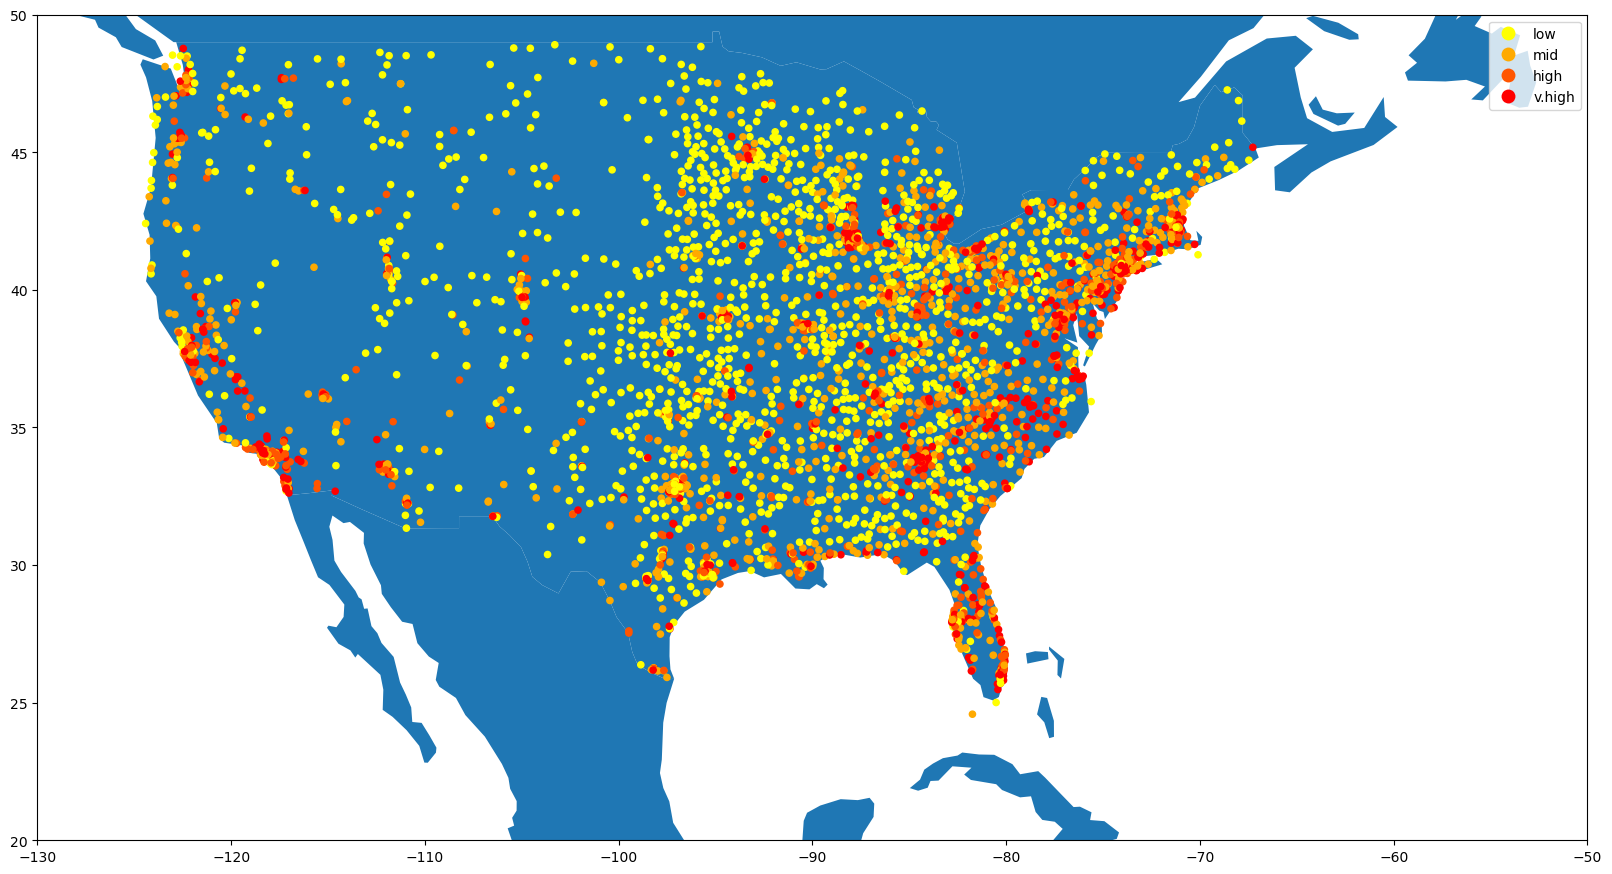

In [15]:
#this is a simple map that goes with geopandas
geometry = [Point(xy) for xy in zip(data_EDV['Longitude'], data_EDV['Latitude'])]
gdf = GeoDataFrame(data_EDV, geometry=geometry, crs="EPSG:4326")   
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig = plt.figure(figsize=(20, 22))
ax = world.plot(figsize=(20, 22))
gdf.plot(cmap='autumn_r', column="Score", categorical=True, ax=ax, markersize=20, legend=True)
ax.set_xlim(-130, -50)
ax.set_ylim(20, 50)
leg1 = ax.get_legend()
#https://stackoverflow.com/questions/74143732/customize-legend-labels-in-geopandas
new_legtxt = ["low","mid","high","v.high"]
for ix,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[ix])


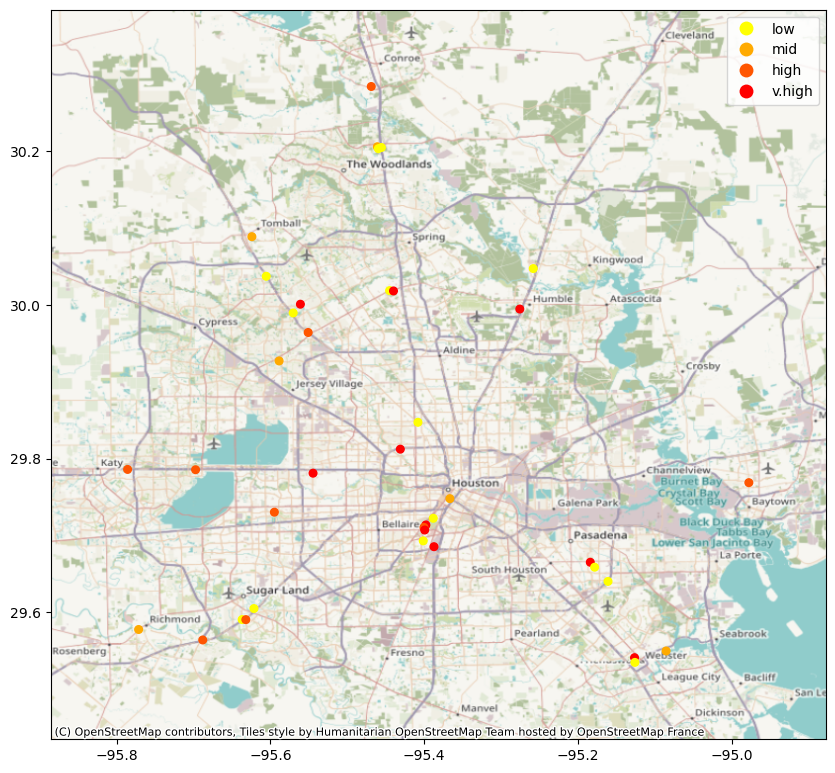

In [16]:
geometry = [Point(xy) for xy in zip(Hou_TX_EDV['Longitude'], Hou_TX_EDV['Latitude'])]
gdf = GeoDataFrame(Hou_TX_EDV, geometry=geometry, crs="EPSG:4326")   

fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
gdf.plot(cmap='autumn_r', column="Score", categorical=True, ax=ax, markersize=30, legend=True)
ax.set_xlim(Hou_TX_EDV['Longitude'].min()-.1, Hou_TX_EDV['Longitude'].max()+.1)
ax.set_ylim(Hou_TX_EDV['Latitude'].min()-.1, Hou_TX_EDV['Latitude'].max()+.1)
leg1 = ax.get_legend()
#https://stackoverflow.com/questions/74143732/customize-legend-labels-in-geopandas
new_legtxt = ["low","mid","high","v.high"]
for ix,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[ix])
cx.add_basemap(ax, crs=gdf.crs)

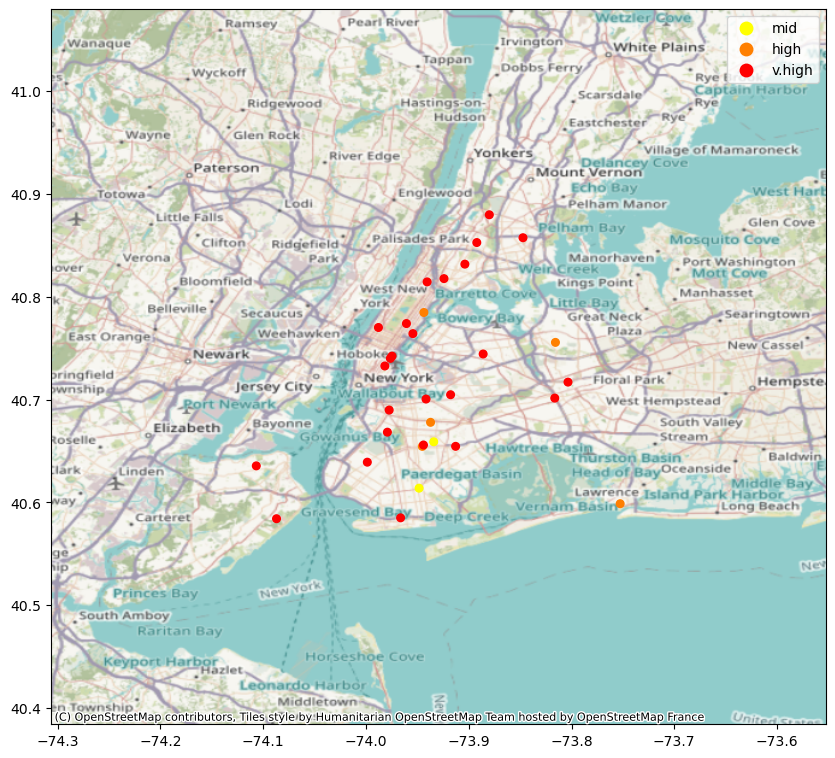

In [17]:
geometry = [Point(xy) for xy in zip(NYC_EDV['Longitude'], NYC_EDV['Latitude'])]
gdf = GeoDataFrame(NYC_EDV, geometry=geometry, crs="EPSG:4326")   

fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
gdf.plot(cmap='autumn_r', column="Score", categorical=True, ax=ax, markersize=30, legend=True)
ax.set_xlim(NYC_EDV['Longitude'].min()-.2, NYC_EDV['Longitude'].max()+.2)
ax.set_ylim(NYC_EDV['Latitude'].min()-.2, NYC_EDV['Latitude'].max()+.2)
leg1 = ax.get_legend()
#https://stackoverflow.com/questions/74143732/customize-legend-labels-in-geopandas
new_legtxt = ["mid","high","v.high"]
for ix,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[ix])

cx.add_basemap(ax, crs=gdf.crs)

### Let's take note of some observations
   - Houston's Hospitals are more spread out
   - NYC's Hospitals mainly have a very high volumn in their EDs
   - Across the USA most high or very high volumn ED Hospitals are around costal area's and the Great Lakes

## Inferential EDA  Part 1 ED Metrics (Houston Vs NYC)

#### Quick Notes:
   - NYC is made up it's 5 boroughs/counties 
   - Houston as a city is made up of three counties
   - We are not looking hospitals with unavailable data for a given metric
   - The alpha will be .05 despite being the healthcare instdury
   - All hypotheses are in the time frame of 2017-2018

## OP_23: Percentage of patients who came to the emergency department with stroke symptoms who received brain scan results within 45 minutes of arrival 

## Let's see if the following Null Hypothesis can be rejected:

- #### Houston Hospitals and NYC Hospitals have no notable differences in their OP_23 metric aka the percentage of patients who came to the emergency department with stroke symptoms who received brain scan results within 45 minutes of arrival

In [18]:
data_23 = df[(df['Measure ID'] == 'OP_23') & (df["Score"] != 'Not Available')].drop_duplicates(subset=['Facility ID'])

In [19]:
NYC_23 = data_23[(data_23['State'] == 'NY') & (data_23['County Name'].isin(["NEW YORK", "KINGS", "BRONX", "RICHMOND", "QUEENS"]))]
len(NYC_23)

12

In [20]:
Hou_TX_23 = data_23[(data_23['County Name'].isin(["HARRIS", "FORT BEND", "MONTGOMERY"])) & (data_23['State'] == 'TX')]
len(Hou_TX_23)

13

### Let's see if there are any outliars in our samples, so we know that all of metrics were sampled in a similar size

In [21]:
NYC_23["Sample"] = NYC_23["Sample"].astype(int)
Hou_TX_23["Sample"] = Hou_TX_23["Sample"].astype(int)

In [22]:
Hou_TX_23[["Score","Sample"]]

Score  Sample
328      64      11
2456     64      75
23988    88      26
28784    69      16
29924    33      27
30477    89      28
35585    83      23
59333    64      11
72532    73      30
79870    75      12
80041   100      24
84009    35      17
87539    97      30

In [23]:
NYC_23[["Score","Sample"]]

Score  Sample
148      93      14
10590    63      19
31946    81      27
35071    50      24
43417    88      24
47285    69      13
48174    80      15
55654    69      13
70305    81      43
70495    55      11
80047    85      20
89381   100      14

### Since the sample is small enough we cut the outlairs out by just looking the set, the only outlairs would right-tailed ones (aka too big) so we will put a cutoff of 30 for our sample size 

In [24]:
Hou_TX_23 = Hou_TX_23[Hou_TX_23["Sample"].astype(int) < 30]
Hou_TX_23[["Score","Sample"]]

Score  Sample
328      64      11
23988    88      26
28784    69      16
29924    33      27
30477    89      28
35585    83      23
59333    64      11
79870    75      12
80041   100      24
84009    35      17

In [25]:
NYC_23 = NYC_23[NYC_23["Sample"].astype(int) < 30]
NYC_23[["Score","Sample"]]

Score  Sample
148      93      14
10590    63      19
31946    81      27
35071    50      24
43417    88      24
47285    69      13
48174    80      15
55654    69      13
70495    55      11
80047    85      20
89381   100      14

### Time for a two sample t-test with an alpha of .05

#### Drumroll please...

In [26]:
stats.ttest_ind(NYC_23["Score"].astype(int), Hou_TX_23["Score"].astype(int))

TtestResult(statistic=0.6848588427495901, pvalue=0.501703017158224, df=19.0)

### The P-Value is way too high, we are looking for an P-vaule that is less then our alpha and that is ten times bigger than our alpha

### Let's visualize 

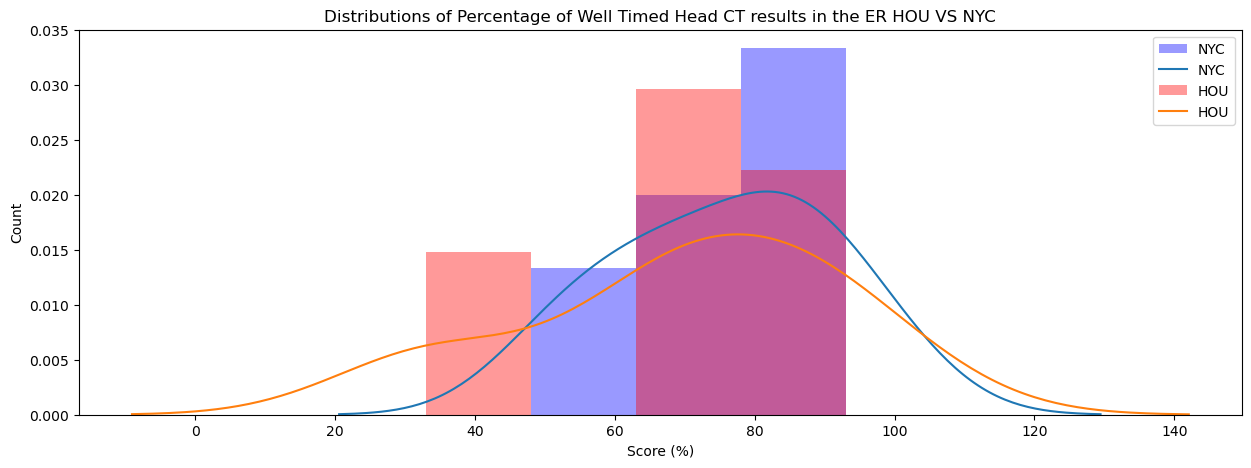

In [27]:
NYC_23["Score"] = NYC_23["Score"].astype(int)
Hou_TX_23["Score"] = Hou_TX_23["Score"].astype(int)
combo = pd.concat([NYC_23["Score"], Hou_TX_23["Score"]])
fig, ax = plt.subplots(figsize=(15,5))
bins = range(int(combo.min()), int(combo.max()), int(combo.median() // 5))
ax.hist(
        x=NYC_23["Score"],
        label='NYC',
        bins=bins,
        color="blue",
        alpha = .4,
        density=True
    )
sns.kdeplot(data=NYC_23, x="Score", label="NYC")
ax.hist(
        x=Hou_TX_23["Score"],
        label='HOU',
        bins=bins,
        color="red",
        alpha = .4,
        density=True
    )
sns.kdeplot(data=Hou_TX_23, x="Score", label="HOU")
ax.set_title("Distributions of Percentage of Well Timed Head CT results in the ER HOU VS NYC")
ax.set_xlabel("Score (%)")
ax.set_ylabel("Count")
ax.legend();

### The distributions are entagled and KDE lines are top of one and other

### It is more than safe to say that we cannot reject null Hypothesis that Houston Hospitals and NYC  Hospitalshave no notable differences in the OP_23 metric aka the percentage of patients who came to the emergency department with stroke symptoms who received brain scan results within 45 minutes of arrival

## OP_22: Percentage of patients who left the emergency department before being seen

## Let's see if the following Null Hypothesis can be rejected:

- #### Houston Hospitals and NYC Hospitals have no notable differences in their OP_22 metric aka the percentage of patients who left the emergency department before being seen

In [28]:
data_22 = df[(df['Measure ID'] == 'OP_22') & (df["Score"] != 'Not Available')].drop_duplicates(subset=['Facility ID'])

In [29]:
NYC_22 = data_22[(data_22['State'] == 'NY') & (data_22['County Name'].isin(["NEW YORK", "KINGS", "BRONX", "RICHMOND", "QUEENS"]))]
len(NYC_22)

35

In [30]:
Hou_TX_22 = data_22[(data_22['County Name'].isin(["HARRIS", "FORT BEND", "MONTGOMERY"])) & (data_22['State'] == 'TX')]
len(Hou_TX_22)

41

### Since the sample is too big to cut the outlairs out by just looking the set, let's use the IQR method mentioned [here](https://saturncloud.io/blog/how-to-detect-and-exclude-outliers-in-a-pandas-dataframe/)

In [31]:
Hou_TX_22["Sample"] = Hou_TX_22["Sample"].astype(int)
Hou_TX_22["Sample"].describe()

count        41.000000
mean      48279.634146
std       56807.555457
min          68.000000
25%       10044.000000
50%       36870.000000
75%       62851.000000
max      316150.000000
Name: Sample, dtype: float64

In [32]:
NYC_22["Sample"] = NYC_22["Sample"].astype(int)
NYC_22["Sample"].describe()

count        35.000000
mean     111214.114286
std       68489.895300
min       22635.000000
25%       69421.500000
50%       98425.000000
75%      126777.500000
max      341413.000000
Name: Sample, dtype: float64

In [33]:
#Little help from: https://saturncloud.io/blog/how-to-detect-and-exclude-outliers-in-a-pandas-dataframe/
Q1 = NYC_22["Sample"].quantile(0.25)
Q3 = NYC_22["Sample"].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
NYC_22 = NYC_22[(NYC_22["Sample"] >= Q1 - threshold * IQR) & (NYC_22["Sample"] <= Q3 + threshold * IQR)]


In [34]:
NYC_22["Sample"].describe()

count        33.000000
mean      97564.393939
std       40250.399847
min       22635.000000
25%       65276.000000
50%       94380.000000
75%      121435.000000
max      177051.000000
Name: Sample, dtype: float64

In [35]:
#Little help from: https://saturncloud.io/blog/how-to-detect-and-exclude-outliers-in-a-pandas-dataframe/
Q1 = Hou_TX_22["Sample"].quantile(0.25)
Q3 = Hou_TX_22["Sample"].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
Hou_TX_22 = Hou_TX_22[(Hou_TX_22["Sample"] >= Q1 - threshold * IQR) & (Hou_TX_22["Sample"] <= Q3 + threshold * IQR)]

In [36]:
Hou_TX_22["Sample"].describe()

count       39.000000
mean     38234.410256
std      31641.279201
min         68.000000
25%       9211.500000
50%      36322.000000
75%      57640.500000
max      98405.000000
Name: Sample, dtype: float64

### That did not get rid of my left-tail outlair (aka vales that are too little) because of my high IQR, let's tinker the method so it will those outliars too

In [37]:
Hou_TX_22 = Hou_TX_22[(Hou_TX_22["Sample"] >= Q1/threshold) & (Hou_TX_22["Sample"] <= Q3 + threshold * IQR)]
Hou_TX_22["Sample"].describe()

count       31.000000
mean     47796.645161
std      28403.264723
min       8022.000000
25%      25455.500000
50%      43897.000000
75%      67011.000000
max      98405.000000
Name: Sample, dtype: float64

In [38]:
len(Hou_TX_22), len(NYC_22)

(31, 33)

### Time for a two sample t-test with an alpha of .05

#### Drumroll please...

In [39]:
stats.ttest_ind(NYC_22["Score"].astype(int), Hou_TX_22["Score"].astype(int))

TtestResult(statistic=2.472936816843807, pvalue=0.016156010014170465, df=62.0)

### The P-Value makes it, phew!,  but if the alpha were to be stricter at .01 it would fail to reject our null hypothesis

### Let's visualize before engaging in p-hacking 

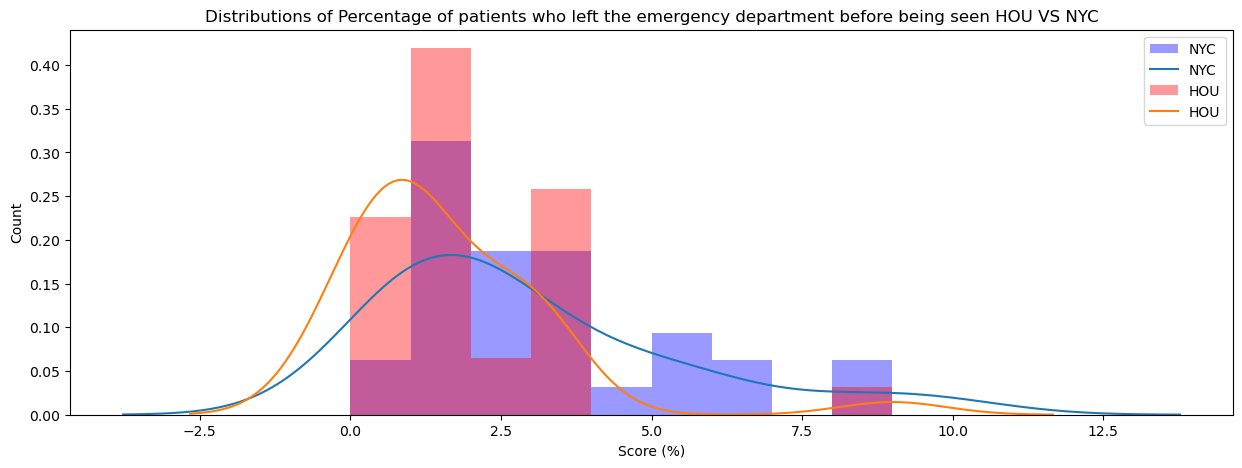

In [40]:
NYC_22["Score"] = NYC_22["Score"].astype(int)
Hou_TX_22["Score"] = Hou_TX_22["Score"].astype(int)
combo = pd.concat([NYC_22["Score"], Hou_TX_22["Score"]])
fig, ax = plt.subplots(figsize=(15,5))
bins = range(int(combo.min()), int(combo.max()), int(combo.median()))
ax.hist(
        x=NYC_22["Score"],
        label='NYC',
        bins=bins,
        color="blue",
        alpha = .4,
        density=True
    )
sns.kdeplot(data=NYC_22, x="Score", label="NYC")
ax.hist(
        x=Hou_TX_22["Score"],
        label='HOU',
        bins=bins,
        color="red",
        alpha = .4,
        density=True
    )
sns.kdeplot(data=Hou_TX_22, x="Score", label="HOU")
ax.set_title("Distributions of Percentage of patients who left the emergency department before being seen HOU VS NYC")
ax.set_xlabel("Score (%)")
ax.set_ylabel("Count")
ax.legend();

### The distributions are much less entagled then the previous graph and the Houston KDE line looks it's skewed left from the NYC one

### Since the P-Value is lower than the alpha will reject th null hypothesis in favor of an alternative hypothesis based on the graph.
   - Houston Hospitals tend to have lower OP_22 aka the percentage of patients who left the emergency department before being seen  than NYC Hospitals

## OP_18b: Average (median) time patients spent in the emergency department before leaving from the visit

## Let's see if the following Null Hypothesis can be rejected:

- #### Houston Hospitals and NYC Hospitals have no notable differences in their OP_18b metric aka Average (median) time patients spent in the emergency department before leaving from the visit

In [41]:
data_18b = df[(df['Measure ID'] == 'OP_18b') & (df["Score"] != 'Not Available')].drop_duplicates(subset=['Facility ID'])

In [42]:
NYC_18b = data_18b[(data_18b['State'] == 'NY') & (data_18b['County Name'].isin(["NEW YORK", "KINGS", "BRONX", "RICHMOND", "QUEENS"]))]
len(NYC_18b)

35

In [43]:
Hou_TX_18b = data_18b[(data_18b['County Name'].isin(["HARRIS", "FORT BEND", "MONTGOMERY"])) & (data_18b['State'] == 'TX')]
len(Hou_TX_18b)

43

In [44]:
Hou_TX_18b["Sample"] = Hou_TX_18b["Sample"].astype(int)
Hou_TX_18b["Sample"].describe()

count      43.000000
mean      441.255814
std       281.796202
min        23.000000
25%       373.500000
50%       393.000000
75%       522.000000
max      1879.000000
Name: Sample, dtype: float64

### Using the IQR method mentioned [here](https://saturncloud.io/blog/how-to-detect-and-exclude-outliers-in-a-pandas-dataframe/) agian

In [45]:
#Little help from: https://saturncloud.io/blog/how-to-detect-and-exclude-outliers-in-a-pandas-dataframe/
Q1 = Hou_TX_18b["Sample"].quantile(0.25)
Q3 = Hou_TX_18b["Sample"].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
Hou_TX_18b = Hou_TX_18b[(Hou_TX_18b["Sample"] >= Q1 - threshold * IQR) & (Hou_TX_18b["Sample"] <= Q3 + threshold * IQR)]
Hou_TX_18b["Sample"].describe()

count     35.000000
mean     429.771429
std       99.384602
min      229.000000
25%      376.500000
50%      393.000000
75%      516.500000
max      640.000000
Name: Sample, dtype: float64

In [46]:
NYC_18b["Sample"] = NYC_18b["Sample"].astype(int)
NYC_18b["Sample"].describe()

count     35.000000
mean     389.971429
std       85.608028
min      286.000000
25%      349.500000
50%      373.000000
75%      393.500000
max      764.000000
Name: Sample, dtype: float64

In [47]:
#Little help from: https://saturncloud.io/blog/how-to-detect-and-exclude-outliers-in-a-pandas-dataframe/
Q1 = NYC_18b["Sample"].quantile(0.25)
Q3 = NYC_18b["Sample"].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
NYC_18b = NYC_18b[(NYC_18b["Sample"] >= Q1 - threshold * IQR) & (NYC_18b["Sample"] <= Q3 + threshold * IQR)]
NYC_18b["Sample"].describe()

count     32.000000
mean     368.750000
std       34.931269
min      286.000000
25%      348.750000
50%      371.000000
75%      386.250000
max      446.000000
Name: Sample, dtype: float64

In [48]:
len(Hou_TX_18b), len(NYC_18b)

(35, 32)

### Time for a two sample t-test with an alpha of .05

#### Drumroll please...

In [49]:
stats.ttest_ind(NYC_18b["Score"].astype(int), Hou_TX_18b["Score"].astype(int))

TtestResult(statistic=4.312940267305688, pvalue=5.591910385700952e-05, df=65.0)

### The P-Value is much lower than alpha 

### Let's visualize

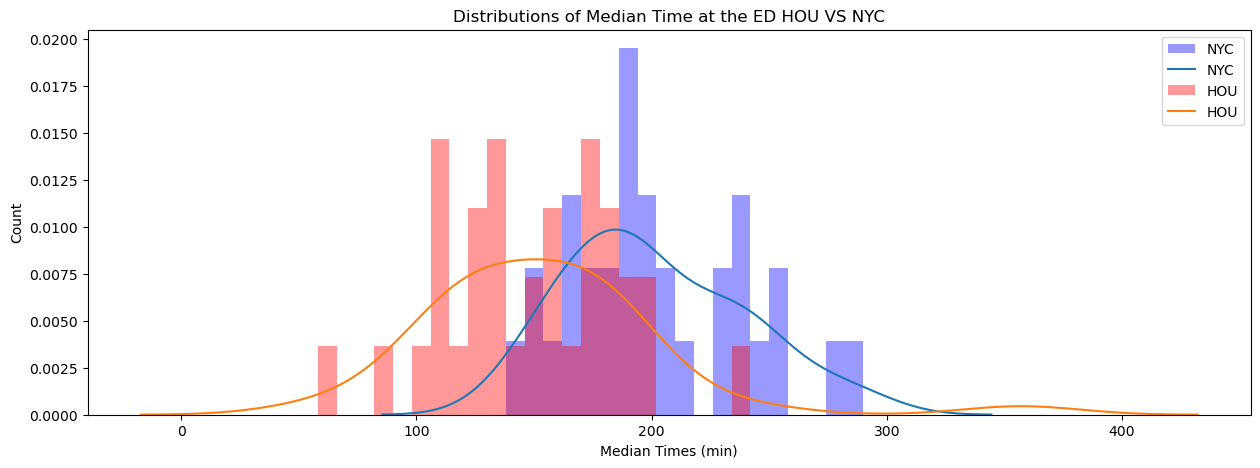

In [50]:
NYC_18b["Score"] = NYC_18b["Score"].astype(int)
Hou_TX_18b["Score"] = Hou_TX_18b["Score"].astype(int)
combo = pd.concat([NYC_18b["Score"], Hou_TX_18b["Score"]])
fig, ax = plt.subplots(figsize=(15,5))
bins = range(int(combo.min()), int(combo.max()), int(combo.median())//20)
ax.hist(
        x=NYC_18b["Score"].astype(int),
        label='NYC',
        bins=bins,
        color="blue",
        alpha = .4,
        density=True
    )
sns.kdeplot(data=NYC_18b, x="Score", label="NYC")
ax.hist(
        x=Hou_TX_18b["Score"].astype(int),
        label='HOU',
        bins=bins,
        color="red",
        alpha = .4,
        density=True
    )
sns.kdeplot(data=Hou_TX_18b, x="Score", label="HOU")
ax.set_title("Distributions of Median Time at the ED HOU VS NYC")
ax.set_xlabel("Median Times (min)")
ax.set_ylabel("Count")
ax.legend();

### The distributions are up agianst each other, with the Houston distribution and KDE line on the left and the NYC  distribution and KDE line on the right

### Since the P-Value is lower than the alpha will reject th null hypothesis in favor of an alternative hypothesis based on the graph.
   - Houston Hospitals tend to have lower OP_18b aka Average (median) time patients spent in the emergency department before leaving from the visit than NYC Hospitals

## OP_ED_1b: Average (median) admit decision time to time of departure from the emergency department for emergency department patients admitted to inpatient status

## Let's see if the following Null Hypothesis can be rejected:

- #### Houston Hospitals and NYC Hospitals have no notable differences in their OP_ED_1b metric aka Average (median) admit decision time to time of departure from the emergency department for emergency department patients admitted to inpatient status

In [51]:
data_ED_1b = df[(df['Measure ID'] == 'ED_1b') & (df["Score"] != 'Not Available')].drop_duplicates(subset=['Facility ID'])

In [52]:
Hou_TX_ED_1b = data_ED_1b[(data_ED_1b['County Name'].isin(["HARRIS", "FORT BEND", "MONTGOMERY"])) & (data_ED_1b['State'] == 'TX')]
len(Hou_TX_ED_1b)

38

In [53]:
NYC_ED_1b = data_ED_1b[(data_ED_1b['State'] == 'NY') & (data_ED_1b['County Name'].isin(["NEW YORK", "KINGS", "BRONX", "RICHMOND", "QUEENS"]))]
len(NYC_ED_1b)

35

In [54]:
Hou_TX_ED_1b["Sample"] = Hou_TX_ED_1b["Sample"].astype(int)
Hou_TX_ED_1b["Sample"].describe()

count      38.000000
mean      755.552632
std       690.457064
min        13.000000
25%       549.500000
50%       683.500000
75%       860.750000
max      4419.000000
Name: Sample, dtype: float64

### Using the IQR method mentioned [here](https://saturncloud.io/blog/how-to-detect-and-exclude-outliers-in-a-pandas-dataframe/) agian

In [55]:
Q1 = Hou_TX_ED_1b["Sample"].quantile(0.25)
Q3 = Hou_TX_ED_1b["Sample"].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
Hou_TX_ED_1b = Hou_TX_ED_1b[(Hou_TX_ED_1b["Sample"] >= Q1 - threshold * IQR) & (Hou_TX_ED_1b["Sample"] <= Q3 + threshold * IQR)]
Hou_TX_ED_1b["Sample"].describe()

count      32.000000
mean      752.906250
std       230.936293
min       213.000000
25%       604.500000
50%       711.500000
75%       864.750000
max      1257.000000
Name: Sample, dtype: float64

In [56]:
NYC_ED_1b["Sample"] = NYC_ED_1b["Sample"].astype(int)
NYC_ED_1b["Sample"].describe()

count      35.000000
mean      796.542857
std       264.461756
min        96.000000
25%       650.000000
50%       820.000000
75%       894.500000
max      1530.000000
Name: Sample, dtype: float64

In [57]:
Q1 = NYC_ED_1b["Sample"].quantile(0.25)
Q3 = NYC_ED_1b["Sample"].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
NYC_ED_1b = NYC_ED_1b[(NYC_ED_1b["Sample"] >= Q1 - threshold * IQR) & (NYC_ED_1b["Sample"] <= Q3 + threshold * IQR)]
NYC_ED_1b["Sample"].describe()

count      33.000000
mean      795.545455
std       205.335715
min       380.000000
25%       662.000000
50%       820.000000
75%       888.000000
max      1254.000000
Name: Sample, dtype: float64

In [58]:
len(Hou_TX_ED_1b), len(NYC_ED_1b)

(32, 33)

### Time for a two sample t-test with an alpha of .05

#### Drumroll please...

In [59]:
stats.ttest_ind(NYC_ED_1b["Score"].astype(int), Hou_TX_ED_1b["Score"].astype(int))

TtestResult(statistic=8.394137271239225, pvalue=7.310888476417665e-12, df=63.0)

### The P-Value is much lower than alpha 

### Let's visualize

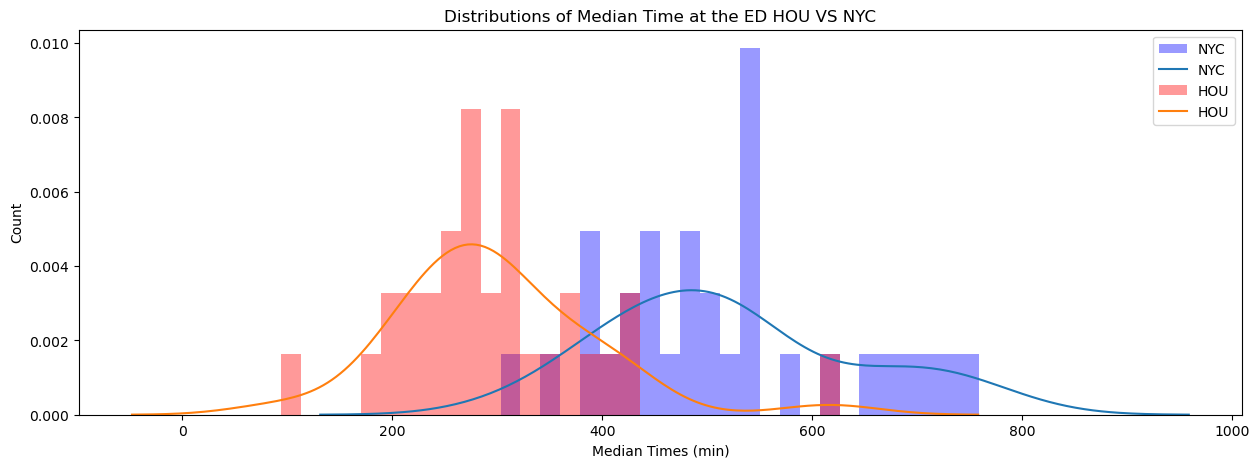

In [60]:
NYC_ED_1b["Score"] = NYC_ED_1b["Score"].astype(int)
Hou_TX_ED_1b["Score"] = Hou_TX_ED_1b["Score"].astype(int)
combo = pd.concat([NYC_ED_1b["Score"], Hou_TX_ED_1b["Score"]])
fig, ax = plt.subplots(figsize=(15,5))
bins = range(int(combo.min()), int(combo.max()), int(combo.median())//20)
ax.hist(
        x=NYC_ED_1b["Score"].astype(int),
        label='NYC',
        bins=bins,
        color="blue",
        alpha = .4,
        density=True
    )
sns.kdeplot(data=NYC_ED_1b, x="Score", label="NYC")
ax.hist(
        x=Hou_TX_ED_1b["Score"].astype(int),
        label='HOU',
        bins=bins,
        color="red",
        alpha = .4,
        density=True
    )
sns.kdeplot(data=Hou_TX_ED_1b, x="Score", label="HOU")
ax.set_title("Distributions of Median Time at the ED HOU VS NYC")
ax.set_xlabel("Median Times (min)")
ax.set_ylabel("Count")
ax.legend();

### The distributions are up agianst each other, but even less so than the pervious graph, with the Houston distribution and KDE line on the left and the NYC  distribution and KDE line on the right

### Since the P-Value is lower than the alpha will reject th null hypothesis in favor of an alternative hypothesis based on the graph.
   - Houston Hospitals tend to have lower OP_ED_1b metric aka Average (median) admit decision time to time of departure from the emergency department for emergency department patients admitted to inpatient status than NYC Hospitals

## SEP_1: Percentage of patients who received appropriate care for severe sepsis and/or septic shock

## Let's see if the following Null Hypothesis can be rejected:

- #### Houston Hospitals and NYC Hospitals have no notable differences in their OP_ED_1b metric aka the percentage of patients who received appropriate care for severe sepsis and/or septic shock

In [61]:
data_SEP_1 = df[(df['Measure ID'] == 'SEP_1') & (df["Score"] != 'Not Available')].drop_duplicates(subset=['Facility ID'])

In [62]:
Hou_TX_SEP_1 = data_SEP_1[(data_SEP_1['County Name'].isin(["HARRIS", "FORT BEND", "MONTGOMERY"])) & (data_SEP_1['State'] == 'TX')]
len(Hou_TX_SEP_1)

32

In [63]:
NYC_SEP_1 = data_SEP_1[(data_SEP_1['State'] == 'NY') & (data_SEP_1['County Name'].isin(["NEW YORK", "KINGS", "BRONX", "RICHMOND", "QUEENS"]))]
len(NYC_SEP_1)

36

In [64]:
Hou_TX_SEP_1["Sample"] = Hou_TX_SEP_1["Sample"].astype(int)
Hou_TX_SEP_1["Sample"].describe()

count     32.00000
mean     170.56250
std      137.88844
min       12.00000
25%       95.75000
50%      141.00000
75%      179.00000
max      678.00000
Name: Sample, dtype: float64

### Using the IQR method mentioned [here](https://saturncloud.io/blog/how-to-detect-and-exclude-outliers-in-a-pandas-dataframe/) agian

In [65]:
Q1 = Hou_TX_SEP_1["Sample"].quantile(0.25)
Q3 = Hou_TX_SEP_1["Sample"].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
Hou_TX_SEP_1 = Hou_TX_SEP_1[(Hou_TX_SEP_1["Sample"] >= Q1 - threshold * IQR) & (Hou_TX_SEP_1["Sample"] <= Q3 + threshold * IQR)]
Hou_TX_SEP_1["Sample"].describe()

count     28.000000
mean     126.500000
std       55.652027
min       12.000000
25%       91.500000
50%      127.500000
75%      159.000000
max      259.000000
Name: Sample, dtype: float64

### That did not get rid of my left-tail outlair (aka vales that are too little) because of my high IQR, let's tinker the method so it will those outliars too

In [66]:
Hou_TX_SEP_1 = Hou_TX_SEP_1[(Hou_TX_SEP_1["Sample"] >= Q1/threshold) & (Hou_TX_SEP_1["Sample"] <= Q3 + threshold * IQR)]
Hou_TX_SEP_1["Sample"].describe()

count     25.000000
mean     137.960000
std       46.499534
min       69.000000
25%       98.000000
50%      140.000000
75%      165.000000
max      259.000000
Name: Sample, dtype: float64

In [67]:
NYC_SEP_1["Sample"] = NYC_SEP_1["Sample"].astype(int)
NYC_SEP_1["Sample"].describe()

count     36.000000
mean     149.194444
std      114.080878
min       12.000000
25%       93.750000
50%      126.000000
75%      156.250000
max      709.000000
Name: Sample, dtype: float64

In [68]:
Q1 = NYC_SEP_1["Sample"].quantile(0.25)
Q3 = NYC_SEP_1["Sample"].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
NYC_SEP_1 = NYC_SEP_1[(NYC_SEP_1["Sample"] >= Q1 - threshold * IQR) & (NYC_SEP_1["Sample"] <= Q3 + threshold * IQR)]
NYC_SEP_1["Sample"].describe()

count     33.000000
mean     123.151515
std       46.917561
min       12.000000
25%       90.000000
50%      120.000000
75%      146.000000
max      221.000000
Name: Sample, dtype: float64

In [69]:
NYC_SEP_1 = NYC_SEP_1[(NYC_SEP_1["Sample"] >= Q1/threshold) & (NYC_SEP_1["Sample"] <= Q3 + threshold * IQR)]
NYC_SEP_1["Sample"].describe()

count     30.000000
mean     131.866667
std       39.121150
min       82.000000
25%       99.250000
50%      126.000000
75%      148.250000
max      221.000000
Name: Sample, dtype: float64

In [70]:
len(Hou_TX_SEP_1), len(NYC_SEP_1)

(25, 30)

### Time for a two sample t-test with an alpha of .05

#### Drumroll please...

In [71]:
stats.ttest_ind(NYC_SEP_1["Score"].astype(int), Hou_TX_SEP_1["Score"].astype(int))

TtestResult(statistic=-0.4783287801634075, pvalue=0.6343834830230008, df=53.0)

### The P-Value is way too high, we are looking for an P-vaule that is less then our alpha

### Let's visualize

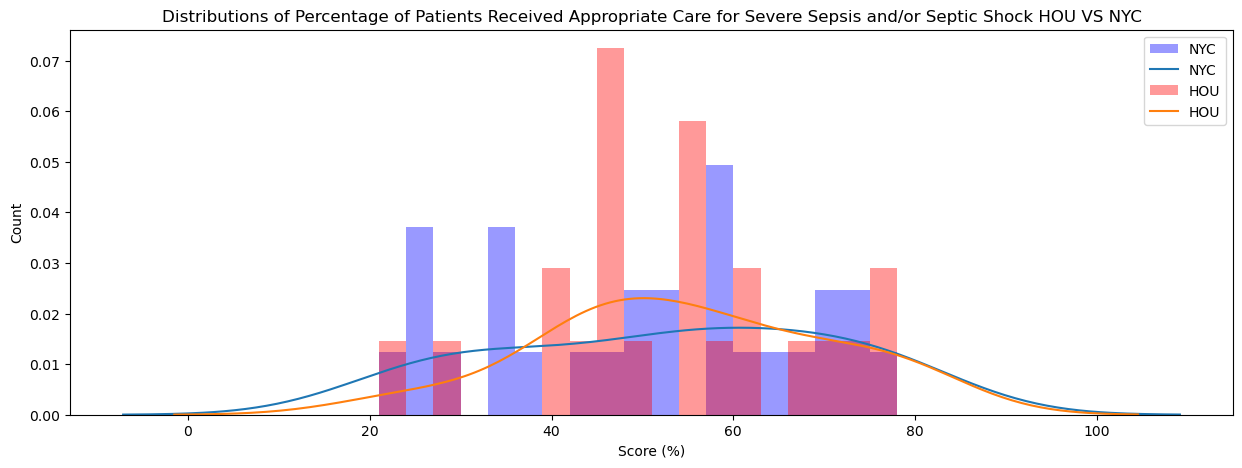

In [72]:
NYC_SEP_1["Score"] = NYC_SEP_1["Score"].astype(int)
Hou_TX_SEP_1["Score"] = Hou_TX_SEP_1["Score"].astype(int)
combo = pd.concat([NYC_SEP_1["Score"], Hou_TX_SEP_1["Score"]])
fig, ax = plt.subplots(figsize=(15,5))
bins = range(int(combo.min()), int(combo.max()), int(combo.median())//15)
ax.hist(
        x=NYC_SEP_1["Score"].astype(int),
        label='NYC',
        bins=bins,
        color="blue",
        alpha = .4,
        density=True
    )
sns.kdeplot(data=NYC_SEP_1, x="Score", label='NYC')
ax.hist(
        x=Hou_TX_SEP_1["Score"].astype(int),
        label='HOU',
        bins=bins,
        color="red",
        alpha = .4,
        density=True
    )
sns.kdeplot(data=Hou_TX_SEP_1, x="Score", label='HOU')
ax.set_title("Distributions of Percentage of Patients Received Appropriate Care for Severe Sepsis and/or Septic Shock HOU VS NYC")
ax.set_xlabel("Score (%)")
ax.set_ylabel("Count")
ax.legend();

### The distributions are nearly completely intertwined and KDE lines are top of one and other

### It is more than safe to say that we cannot reject null Hypothesis that Houston Hospitals and NYC Hospitals have no notable differences in their OP_ED_1b metric aka the percentage of patients who received appropriate care for severe sepsis and/or septic shock

## OP_29: Percentage of patients receiving appropriate recommendation for follow-up screening colonoscopy

## Let's see if the following Null Hypothesis can be rejected:

- #### Houston Hospitals and NYC Hospitals have no notable differences in their OP_29 metric aka the percentage of patients receiving appropriate recommendation for follow-up screening colonoscopy

In [73]:
data_29 = df[(df['Measure ID'] == 'OP_29') & (df["Score"] != 'Not Available')].drop_duplicates(subset=['Facility ID'])

In [74]:
Hou_TX_29 = data_29[(data_29['County Name'].isin(["HARRIS", "FORT BEND", "MONTGOMERY"])) & (data_29['State'] == 'TX')]
len(Hou_TX_29)

33

In [75]:
NYC_29 = data_29[(data_29['State'] == 'NY') & (data_29['County Name'].isin(["NEW YORK", "KINGS", "BRONX", "RICHMOND", "QUEENS"]))]
len(NYC_29)

33

In [76]:
Hou_TX_29["Sample"] = Hou_TX_29["Sample"].astype(int)
Hou_TX_29["Sample"].describe()

count     33.000000
mean     113.151515
std      134.445649
min       13.000000
25%       44.000000
50%       66.000000
75%      135.000000
max      739.000000
Name: Sample, dtype: float64

### Using the IQR method mentioned [here](https://saturncloud.io/blog/how-to-detect-and-exclude-outliers-in-a-pandas-dataframe/) agian

In [77]:
Q1 = Hou_TX_29["Sample"].quantile(0.25)
Q3 = Hou_TX_29["Sample"].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
Hou_TX_29 = Hou_TX_29[(Hou_TX_29["Sample"] >= Q1 - threshold * IQR) & (Hou_TX_29["Sample"] <= Q3 + threshold * IQR)]
Hou_TX_29["Sample"].describe()

count     32.000000
mean      93.593750
std       75.025527
min       13.000000
25%       43.000000
50%       65.000000
75%      120.000000
max      264.000000
Name: Sample, dtype: float64

### That did not get rid of my left-tail outlair (aka vales that are too little) because of my high IQR, let's tinker the method so it will those outliars too

In [78]:
Hou_TX_29 = Hou_TX_29[(Hou_TX_29["Sample"] >= Q1/threshold) & (Hou_TX_29["Sample"] <= Q3 + threshold * IQR)]
Hou_TX_29["Sample"].describe()

count     28.000000
mean     103.821429
std       74.772273
min       34.000000
25%       56.250000
50%       71.500000
75%      136.750000
max      264.000000
Name: Sample, dtype: float64

In [79]:
NYC_29["Sample"] = NYC_29["Sample"].astype(int)
NYC_29["Sample"].describe()

count     33.000000
mean     119.393939
std       84.773573
min       11.000000
25%       68.000000
50%       86.000000
75%      140.000000
max      415.000000
Name: Sample, dtype: float64

In [80]:
Q1 = NYC_29["Sample"].quantile(0.25)
Q3 = NYC_29["Sample"].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
NYC_29 = NYC_29[(NYC_29["Sample"] >= Q1 - threshold * IQR) & (NYC_29["Sample"] <= Q3 + threshold * IQR)]
NYC_29["Sample"].describe()

count     31.000000
mean     103.129032
std       55.036195
min       11.000000
25%       66.500000
50%       85.000000
75%      130.500000
max      227.000000
Name: Sample, dtype: float64

In [81]:
NYC_29["Score"].astype(int).describe()

count     31.000000
mean      85.741935
std       20.739604
min       20.000000
25%       79.500000
50%       94.000000
75%      100.000000
max      100.000000
Name: Score, dtype: float64

In [82]:
len(Hou_TX_29), len(NYC_29)

(28, 31)

### Time for a two sample t-test with an alpha of .05

#### Drumroll please...

In [83]:
stats.ttest_ind(NYC_29["Score"].astype(int), Hou_TX_29["Score"].astype(int))

TtestResult(statistic=0.16642017184657731, pvalue=0.8684152377645549, df=57.0)

### The P-Value is way too high, we are looking for an P-vaule that is less then our alpha and that is ten times bigger than our alpha

### Let's visualize

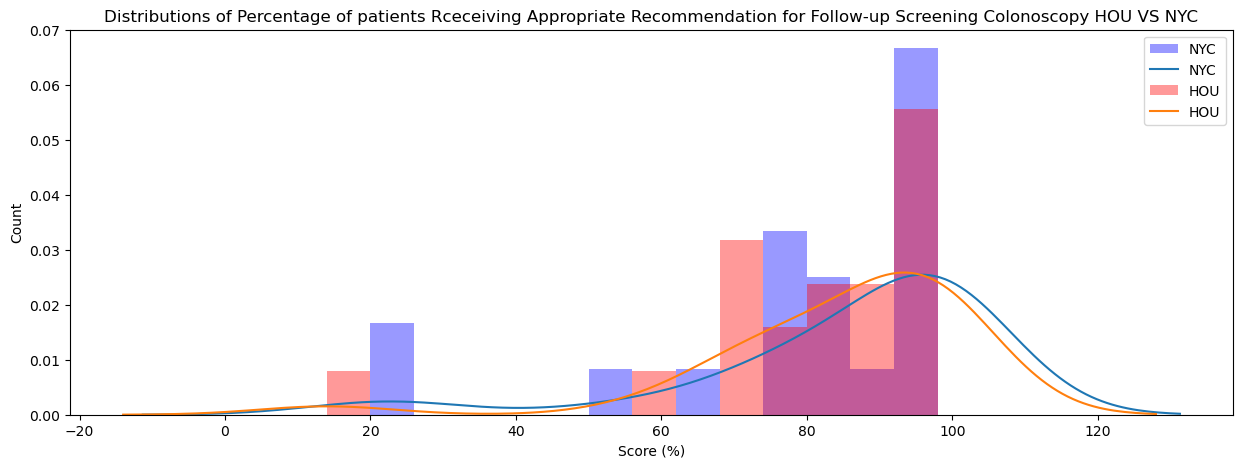

In [84]:
NYC_29["Score"] = NYC_29["Score"].astype(int)
Hou_TX_29["Score"] = Hou_TX_29["Score"].astype(int)
combo = pd.concat([NYC_29["Score"], Hou_TX_29["Score"]])
fig, ax = plt.subplots(figsize=(15,5))
bins = range(int(combo.min()), int(combo.max()), int(combo.median())//15)
ax.hist(
        x=NYC_29["Score"].astype(int),
        label='NYC',
        bins=bins,
        color="blue",
        alpha = .4,
        density=True
    )
sns.kdeplot(data=NYC_29, x="Score", label="NYC")
ax.hist(
        x=Hou_TX_29["Score"].astype(int),
        label='HOU',
        bins=bins,
        color="red",
        alpha = .4,
        density=True
    )
sns.kdeplot(data=Hou_TX_29, x="Score", label="HOU")
ax.set_title("Distributions of Percentage of patients Rceceiving Appropriate Recommendation for Follow-up Screening Colonoscopy HOU VS NYC")
ax.set_xlabel("Score (%)")
ax.set_ylabel("Count")
ax.legend();

### The distributions are entagled and KDE lines are top of one and other

### It is more than safe to say that we cannot reject null Hypothesis that Houston Hospitals and NYC Hospitals have no notable differences in their OP_29 metric aka the percentage of patients receiving appropriate recommendation for follow-up screening colonoscopy

## OP_31: Percentage of patients who had cataract surgery and had improvement in visual function within 90 days following the surgery

## Let's see if the following Null Hypothesis can be rejected:

- #### Houston Hospitals and NYC Hospitals have no notable differences in their OP_31 metric aka the percentage of patients who had cataract surgery and had improvement in visual function within 90 days following the surgery

In [85]:
data_31 = df[(df['Measure ID'] == 'OP_31') & (df["Score"] != 'Not Available')].drop_duplicates(subset=['Facility ID'])

In [86]:
Hou_TX_31 = data_31[(data_31['County Name'].isin(["HARRIS", "FORT BEND", "MONTGOMERY"])) & (data_31['State'] == 'TX')]
len(Hou_TX_31)

0

In [87]:
NYC_31 = data_31[(data_31['State'] == 'NY') & (data_31['County Name'].isin(["NEW YORK", "KINGS", "BRONX", "RICHMOND", "QUEENS"]))]
len(NYC_31)

1

### The samples are too small or non-existant for this OP_31: Percentage of patients who had cataract surgery and had improvement in visual function within 90 days following the surgery to perfrom any test 

## Inferential EDA Part 1 ED and Regualar Timely care Metrics  (Houston Vs NYC) Summary

- In terms of effective care NYC Hospital's EDs and Houston Hospital's EDS are similar as far as we can tell 
- However, Houston is more effective in admiting patients and giving them care in timily matter 
- The latter inference could be due to NYC Hospital's EDs having higher ED volumn than Houston

## Inferential EDA Part 2 New Normal or Same Normal

## OP_23: Percentage of patients who came to the emergency department with stroke symptoms who received brain scan results within 45 minutes of arrival 

## Let's see if the following Null Hypothesis can be rejected:

- #### USA Hospitals, Houston Hospitals, and NYC Hospitals today have no notable differences in their OP_23 metric aka the percentage of patients who came to the emergency department with stroke symptoms who received brain scan results within 45 minutes of arrival than their 2017-2018 counterparts

### Let's rid of some outliars, inculding the left-tail outlairs (aka vales that are too little) in case of high IQR,  so let's use the tinkered the method so it will those get thoes outliars too

In [88]:
data_23["Score"] = data_23["Score"].astype(int)
data_23["Sample"] = data_23["Sample"].astype(int)
data_23["Sample"].describe()

count    1607.000000
mean       20.673304
std        10.326051
min        11.000000
25%        13.000000
50%        18.000000
75%        25.000000
max       167.000000
Name: Sample, dtype: float64

In [89]:
Q1 = data_23["Sample"].quantile(0.25)
Q3 = data_23["Sample"].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
data_23 = data_23[(data_23["Sample"] >= Q1 - threshold * IQR) & (data_23["Sample"] <= Q3 + threshold * IQR)]
data_23["Sample"].describe()

count    1553.000000
mean       19.498390
std         7.668731
min        11.000000
25%        13.000000
50%        17.000000
75%        24.000000
max        43.000000
Name: Sample, dtype: float64

### Time for some t-tests with an alpha of .05
#### Drumroll please...

In [90]:
# the population mean was received from: 
#https://www.medicare.gov/care-compare/details/hospital/330259?city=West%20Hempstead&state=NY&zipcode=11552&measure=hospital-timely-and-effective-care
#https://www.medicare.gov/care-compare/details/hospital/450358?city=Houston&state=TX&zipcode=77096&measure=hospital-timely-and-effective-care
pop = ['USA' , 'TX', 'NY']
data = [data_23[["Score"]], Hou_TX_23[["Score"]], NYC_23[["Score"]]]
x_bar = [x["Score"].mean() for x in data]
mu = [69, 70, 67]

for i in range(3):
    print(pop[i] + " : "+ str(stats.ttest_1samp(data[i]["Score"], mu[i])))

USA : TtestResult(statistic=8.628682929219353, pvalue=1.5092827243028898e-17, df=1552)
TX : TtestResult(statistic=0.0, pvalue=1.0, df=9)
NY : TtestResult(statistic=1.8254777747651205, pvalue=0.09789685828529647, df=10)


### The only P-value low enough is the USA

### Let's visualize

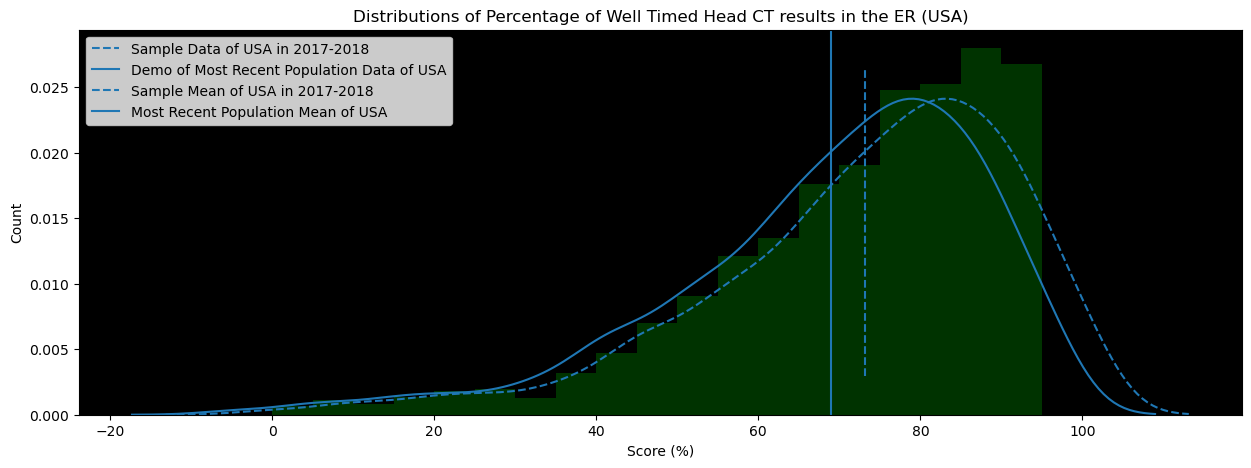

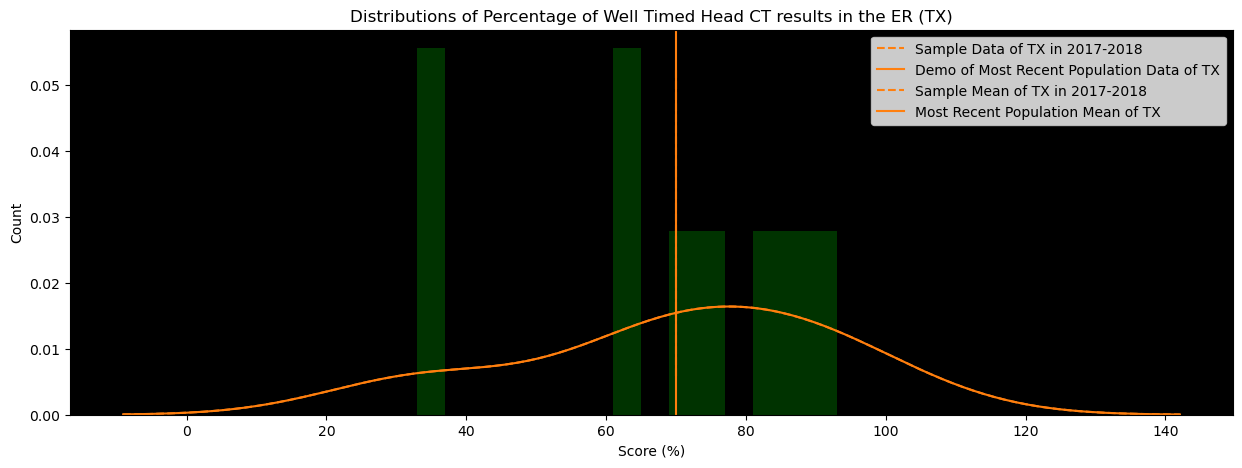

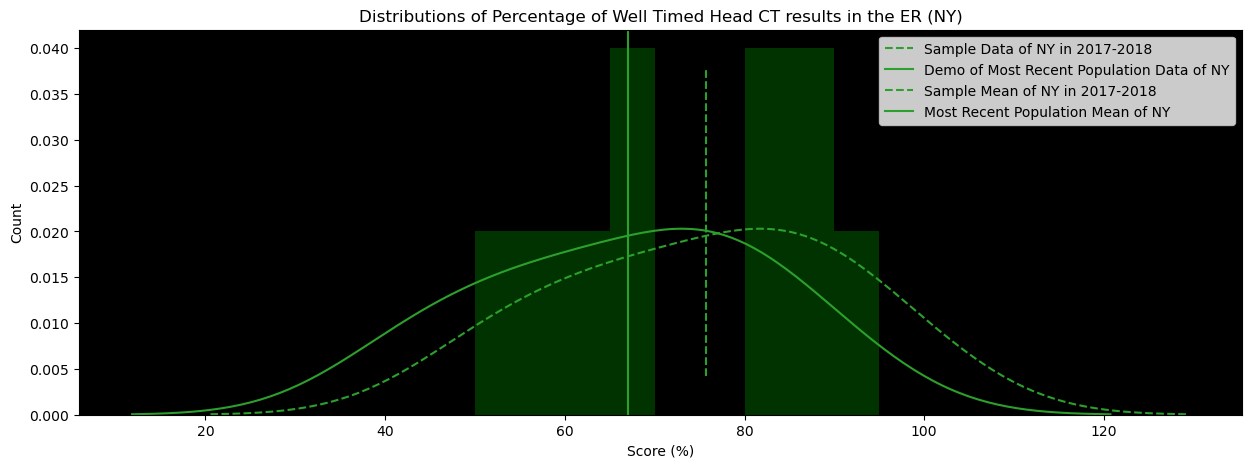

In [91]:
def plot_maker(i):
    fig, ax = plt.subplots(figsize=(15,5))
    bins = range(int(data[i]["Score"].astype(int).min()), int(data[i]["Score"].astype(int).max()), int(data[i]["Score"].astype(int).median())//15)
    ax.hist(
        x=data[i]["Score"],
        bins=bins,
        color="green",
        alpha=.4,
        density=True
    )
    ax.set_facecolor('black')
    colors = sns.color_palette()
    sns.kdeplot(data=data[i], x="Score", color = colors[i], label="Sample Data of " + pop[i] + ' in 2017-2018', linestyle="--")
    sns.kdeplot(data=data[i]+(mu[i]-x_bar[i]), color = colors[i], x="Score", label="Demo of Most Recent Population Data of " + pop[i])
    plt.axvline(x = x_bar[i], ymin = 0.1, ymax = 0.90, color = colors[i], label = 'Sample Mean of ' + pop[i] + ' in 2017-2018', linestyle="--")
    plt.axvline(x = mu[i], color = colors[i], label = 'Most Recent Population Mean of ' + pop[i])
    ax.set_title("Distributions of Percentage of Well Timed Head CT results in the ER ("+ pop[i] +")")
    ax.set_xlabel("Score (%)")
    ax.set_ylabel("Count")
    ax.legend();
for i in range(3):
    plot_maker(i)

## Based on the graphs and the p-vaules from our t-test we fail to reject the null hypothesis that  Houston Hospitals and NYC Hospitals have no notable differences in their OP_23 metric aka the percentage of patients who came to the emergency department with stroke symptoms who received brain scan results within 45 minutes of arrival than their 2017-2018 counterparts

## For USA Hospitals we can reject the null hypothesis in favor of an alternative hypothesis based on the graph.
   -   The OP_23 metric aka the percentage of patients who left the emergency department before being seen is higher today in USA Hospitals than in 2017-2018

## OP_22: Percentage of patients who left the emergency department before being seen

## Let's see if the following Null Hypothesis can be rejected:

- #### USA Hospitals, Houston Hospitals, and NYC Hospitals today have no notable differences in their OP_22 metric aka the percentage of patients who left the emergency department before being seen than their 2017-2018 counterparts

In [92]:
data_22["Score"] = data_22["Score"].astype(int)
data_22["Sample"] = data_22["Sample"].astype(int)
data_22["Sample"].describe()

count      3769.000000
mean      36837.455559
std       40521.584633
min          16.000000
25%       10593.000000
50%       27238.000000
75%       50562.000000
max      800016.000000
Name: Sample, dtype: float64

### Let's rid of some outliars, inculding the left-tail outlairs (aka vales that are too little) in case of high IQR,  so let's use the tinkered the method so it will those get thoes outliars too

In [93]:
Q1 = data_22["Sample"].quantile(0.25)
Q3 = data_22["Sample"].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
data_22 = data_22[(data_22["Sample"] >= Q1/threshold) & (data_22["Sample"] <= Q3 + threshold * IQR)]
data_22["Sample"].describe()

count      2988.000000
mean      37605.655957
std       24463.074666
min        7065.000000
25%       17568.000000
50%       32056.000000
75%       52341.250000
max      110479.000000
Name: Sample, dtype: float64

### Time for some t-tests with an alpha of .05
#### Drumroll please...

In [94]:
# the population mean was received from: 
#https://www.medicare.gov/care-compare/details/hospital/330259?city=West%20Hempstead&state=NY&zipcode=11552&measure=hospital-timely-and-effective-care
#https://www.medicare.gov/care-compare/details/hospital/450358?city=Houston&state=TX&zipcode=77096&measure=hospital-timely-and-effective-care
data = [data_22[["Score"]], Hou_TX_22[["Score"]], NYC_22[["Score"]]]
x_bar = [x["Score"].mean() for x in data]
mu=[3,2,3]

for i in range(3):
    print(pop[i] + " : "+ str(stats.ttest_1samp(data[i]["Score"], mu[i])))

USA : TtestResult(statistic=-45.38491372411001, pvalue=0.0, df=2987)
TX : TtestResult(statistic=-1.2217788701167325, pvalue=0.23130521780858163, df=30)
NY : TtestResult(statistic=-0.06878174499609083, pvalue=0.9455913599913085, df=32)


### All of the p-values expect for USA are too high, but the USA p-value is zero... 

### Let's visualize with demo of pop distribution

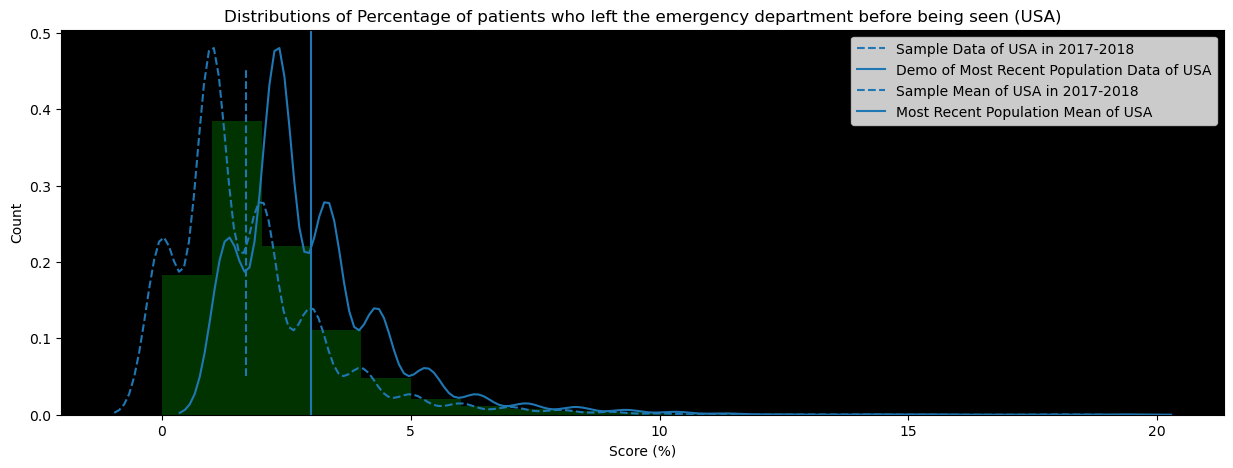

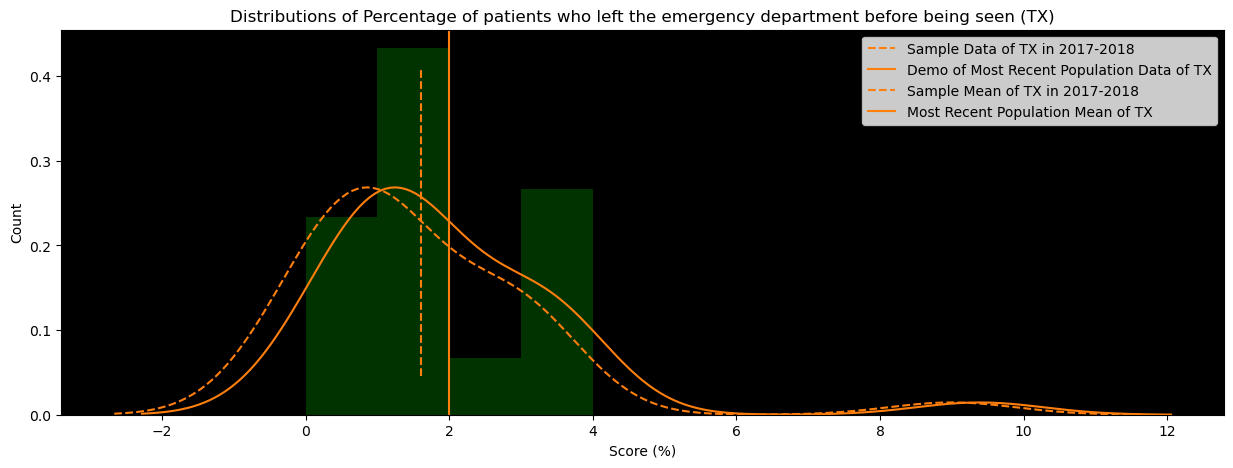

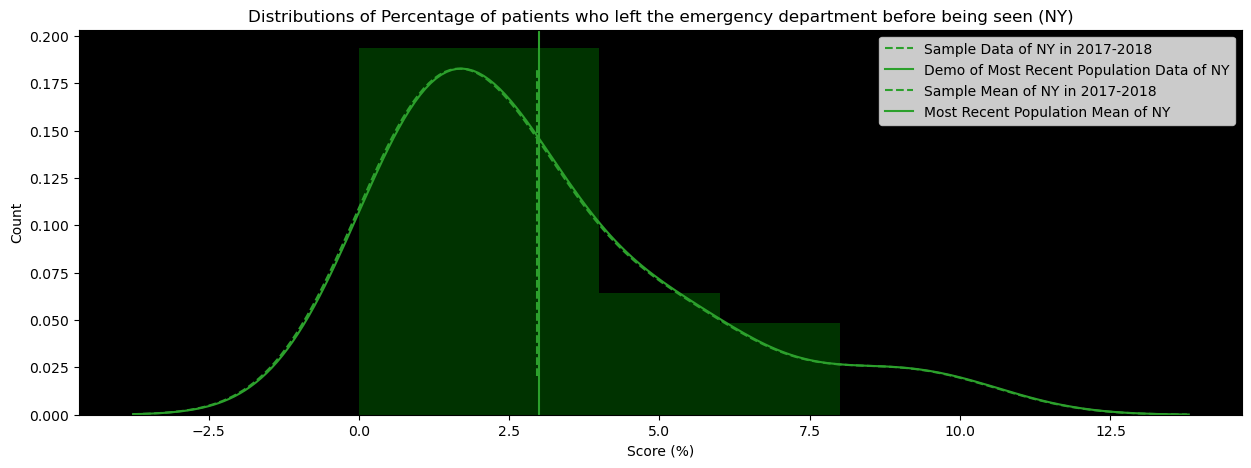

In [95]:
def plot_maker(i):
    fig, ax = plt.subplots(figsize=(15,5))
    bins = range(int(data[i]["Score"].astype(int).min()), int(data[i]["Score"].astype(int).max()), int(data[i]["Score"].astype(int).median()))
    ax.hist(
        x=data[i]["Score"],
        bins=bins,
        color="green",
        alpha=.4,
        density=True
    )
    ax.set_facecolor('black')
    colors = sns.color_palette()
    sns.kdeplot(data=data[i], x="Score", color = colors[i], label="Sample Data of " + pop[i] + ' in 2017-2018', linestyle="--")
    sns.kdeplot(data=data[i]+(mu[i]-x_bar[i]), color = colors[i], x="Score", label="Demo of Most Recent Population Data of " + pop[i])
    plt.axvline(x = x_bar[i], ymin = 0.1, ymax = 0.90, color = colors[i], label = 'Sample Mean of ' + pop[i] + ' in 2017-2018', linestyle="--")
    plt.axvline(x = mu[i], color = colors[i], label = 'Most Recent Population Mean of ' + pop[i])
    ax.set_title("Distributions of Percentage of patients who left the emergency department before being seen ("+ pop[i] +")")
    ax.set_xlabel("Score (%)")
    ax.set_ylabel("Count")
    ax.legend();
for i in range(3):
    plot_maker(i)

## Based on the graphs and the p-vaules from our t-test we fail to reject the null hypothesis that  Houston Hospitals and NYC Hospitals have no notable differences in their OP_22 metric aka the percentage of patients who left the emergency department before being seen than their 2017-2018 counterparts

## For USA Hospitals we can reject the null hypothesis in favor of an alternative hypothesis based on the graph.
   -   The OP_22 metric aka the percentage of patients who left the emergency department before being seen was lower in USA Hospitals in 2017-2018 than today

## OP_18b: Average (median) time patients spent in the emergency department before leaving from the visit

## Let's see if the following Null Hypothesis can be rejected:

- #### USA Hospitals today have no notable differences in their OP_18b metric aka the average (median) time patients spent in the emergency department before leaving from the visit than its 2017-2018 counterparts

### We are only using USA Hospitals because OP_18b uses the median, and we can only interhange the median with mean if: 
   - We have a large enough making the data normalized under clt
### Houston and NYC Hospitals cannot act as large enough sample in this case. 

In [96]:
data_18b["Score"] = data_18b["Score"].astype(int)
data_18b["Sample"] = data_18b["Sample"].astype(int)
data_18b["Sample"].describe()

count     4066.000000
mean       532.736842
std       2103.786617
min         11.000000
25%        347.000000
50%        377.000000
75%        415.000000
max      91314.000000
Name: Sample, dtype: float64

### Let's rid of some outliars, inculding the left-tail outlairs (aka vales that are too little) in case of high IQR,  so let's use the tinkered the method so it will those get thoes outliars too

In [97]:
Q1 = data_18b["Sample"].quantile(0.25)
Q3 = data_18b["Sample"].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
data_18b = data_18b[(data_18b["Sample"] >= Q1/threshold) & (data_18b["Sample"] <= Q3 + threshold * IQR)]
data_18b["Sample"].describe()

count    3307.000000
mean      376.138494
std        51.900291
min       232.000000
25%       352.000000
50%       376.000000
75%       402.000000
max       516.000000
Name: Sample, dtype: float64

### Time for a t-test with an alpha of .05
#### Drumroll please...

In [98]:
# the population mean was received from publicly avablie data at:
#https://data.cms.gov/provider-data/archived-data/hospitals#2024-annual-files
x_bar = data_18b["Score"].sample(n=20).median()
mu = 162

stats.ttest_1samp(data_18b["Score"], mu)

TtestResult(statistic=-26.880634460996948, pvalue=4.057020279197438e-144, df=3306)

### The P-Value is very low

### Let's visualize

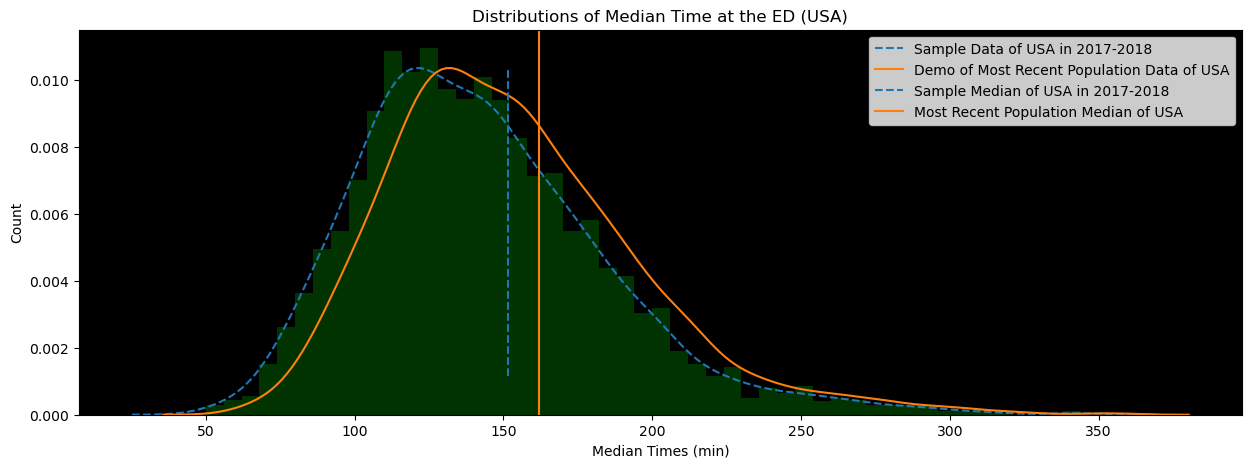

In [99]:
fig, ax = plt.subplots(figsize=(15,5))
bins = range(int(data_18b["Score"].astype(int).min()), int(data_18b["Score"].astype(int).max()), int(data_18b["Score"].astype(int).median())//20)
ax.hist(
        x=data_18b["Score"],
        bins=bins,
        color="green",
        alpha=.4,
        density=True
    )
colors = sns.color_palette()
sns.kdeplot(data=data_18b, x="Score", label="Sample Data of " + pop[0] + ' in 2017-2018', color=colors[0],  linestyle="--")
sns.kdeplot(data=data_18b[["Score"]]+(mu-x_bar), x="Score", label="Demo of Most Recent Population Data of " + pop[0], color=colors[1])
ax.set_facecolor('black')
plt.axvline(x = x_bar, ymin = 0.1, ymax = 0.90, color=colors[0], label = 'Sample Median of USA in 2017-2018', linestyle="--")
plt.axvline(x = mu, color=colors[1], label = 'Most Recent Population Median of USA')
ax.set_title("Distributions of Median Time at the ED (USA)")
ax.set_xlabel("Median Times (min)")
ax.set_ylabel("Count")
ax.legend();

## Based on our t-test and the graph for USA Hospitals we can reject the null hypothesis in favor of an alternative hypothesis based on the graph.
   -   The OP_18b metric aka the average (median) time patients spent in the emergency department before leaving from the visit lower in USA Hospitals in 2017-2018 than today

## SEP_1: Percentage of patients who received appropriate care for severe sepsis and/or septic shock

## Let's see if the following Null Hypothesis can be rejected:

- #### USA Hospitals, Houston Hospitals, and NYC Hospitals today have no notable differences in their SEP_1 metric aka the percentage of patients who received appropriate care for severe sepsis and/or septic shock than their 2017-2018 counterparts

In [100]:
data_SEP_1["Score"] = data_SEP_1["Score"].astype(int)
data_SEP_1["Sample"] = data_SEP_1["Sample"].astype(int)
data_SEP_1["Sample"].describe()

count    3087.000000
mean      152.215096
std       147.266827
min        11.000000
25%        73.000000
50%       113.000000
75%       172.000000
max      1514.000000
Name: Sample, dtype: float64

### Let's rid of some outliars, inculding the left-tail outlairs (aka vales that are too little) in case of high IQR,  so let's use the tinkered the method so it will those get thoes outliars too

In [101]:
Q1 = data_SEP_1["Sample"].quantile(0.25)
Q3 = data_SEP_1["Sample"].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
data_SEP_1 = data_SEP_1[(data_SEP_1["Sample"] >= Q1/threshold) & (data_SEP_1["Sample"] <= Q3 + threshold * IQR)]
data_SEP_1["Sample"].describe()

count    2363.000000
mean      131.055015
std        59.594782
min        49.000000
25%        87.000000
50%       118.000000
75%       158.000000
max       320.000000
Name: Sample, dtype: float64

### Time for some t-tests with an alpha of .05
#### Drumroll please...

In [102]:
# the population mean was received from: 
#https://www.medicare.gov/care-compare/details/hospital/330259?city=West%20Hempstead&state=NY&zipcode=11552&measure=hospital-timely-and-effective-care
#https://www.medicare.gov/care-compare/details/hospital/450358?city=Houston&state=TX&zipcode=77096&measure=hospital-timely-and-effective-care
data = [data_SEP_1[["Score"]], Hou_TX_SEP_1[["Score"]], NYC_SEP_1[["Score"]]]
x_bar = [x["Score"].mean() for x in data]
mu=[60,63,54]

for i in range(3):
    print(pop[i] + " : "+ str(stats.ttest_1samp(data[i]["Score"], mu[i])))

USA : TtestResult(statistic=-8.379979886298466, pvalue=8.961163394816848e-17, df=2362)
TX : TtestResult(statistic=-2.5712973861329, pvalue=0.016754834197197234, df=24)
NY : TtestResult(statistic=-0.36474221600123213, pvalue=0.7179502928036492, df=29)


### The p-value  is low enough for Houston in state and the USA  as a whole

### Let's visualize

In [103]:
def plot_maker(i):
    fig, ax = plt.subplots(figsize=(15,5))
    bins = range(int(data[i]["Score"].astype(int).min()), int(data[i]["Score"].astype(int).max()), int(data[i]["Score"].astype(int).median())//15)
    ax.hist(
        x=data[i]["Score"],
        bins=bins,
        color="green",
        alpha=.4,
        density=True
    )
    ax.set_facecolor('black')
    colors = sns.color_palette()
    sns.kdeplot(data=data[i], x="Score", color = colors[i], label="Sample Data of " + pop[i] + ' in 2017-2018', linestyle="--")
    sns.kdeplot(data=data[i]+(mu[i]-x_bar[i]), color = colors[i], x="Score", label="Demo of Most Recent Population Data of " + pop[i])
    plt.axvline(x = x_bar[i], ymin = 0.1, ymax = 0.90, color = colors[i], label = 'Sample Mean of ' + pop[i] + ' in 2017-2018', linestyle="--")
    plt.axvline(x = mu[i], color = colors[i], label = 'Most Recent Population Mean of ' + pop[i])
    ax.set_title("Distributions of Percentage of Patients Received Appropriate Care for Severe Sepsis and/or Septic Shock (" +pop[i]+ ")")
    ax.set_xlabel("Score (%)")
    ax.set_ylabel("Count")
    ax.legend();

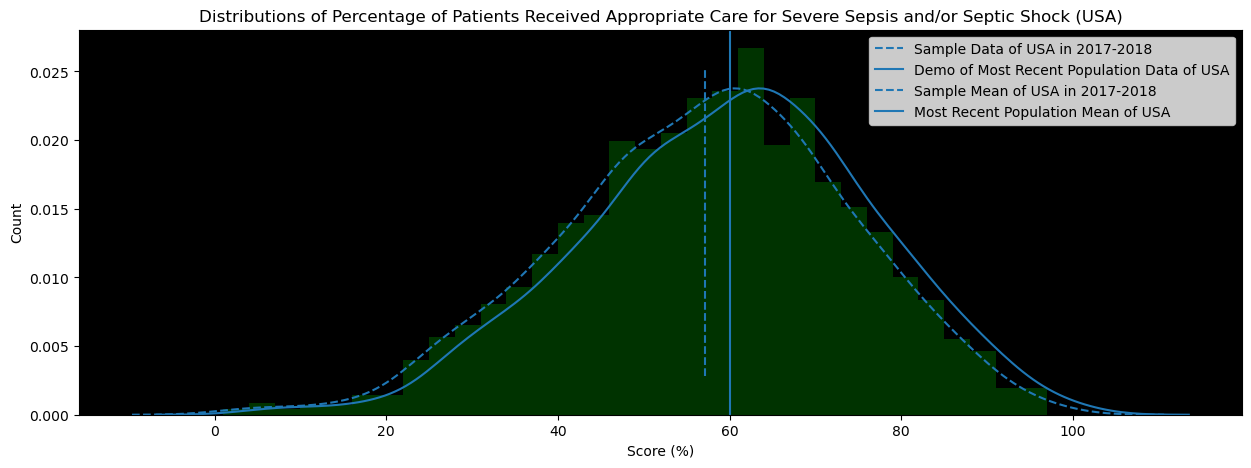

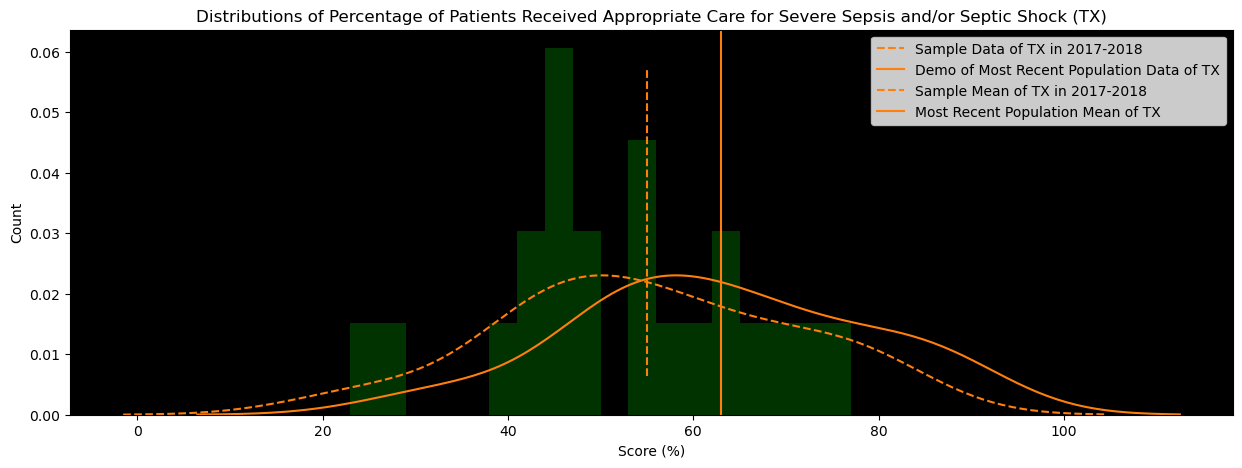

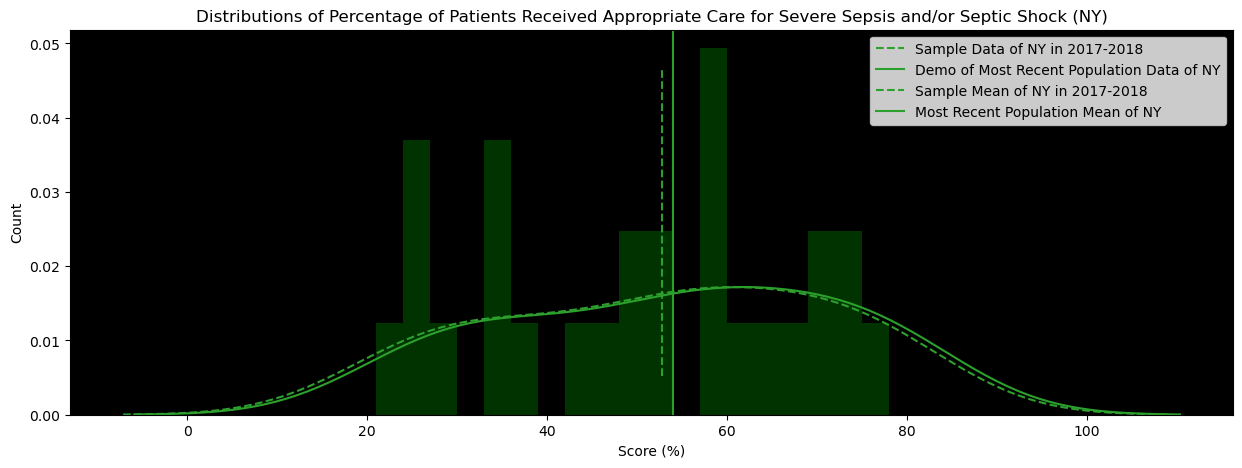

In [104]:
for i in range(3):
    plot_maker(i)

## Based on the graphs and the p-vaules from our t-test we fail to reject the null hypothesis that NYC Hospitals have no notable differences in their SEP_1 metric aka the percentage of patients who received appropriate care for severe sepsis and/or septic shock than their 2017-2018 counterparts

## For USA Hospitals we can reject the null hypothesis in favor of an alternative hypothesis based on the graph.
   -   The SEP_1 metric aka the percentage of patients who received appropriate care for severe sepsis and/or septic shock is higher in USA Hospitals and Houston Hospitals than in 2017-2018.

## OP_29: Percentage of patients receiving appropriate recommendation for follow-up screening colonoscopy

## Let's see if the following Null Hypothesis can be rejected:

- #### USA Hospitals, Houston Hospitals, and NYC Hospitals today have no notable differences in their OP_29 metric aka the percentage of patients receiving appropriate recommendation for follow-up screening colonoscopy than their 2017-2018 counterparts

In [105]:
data_29["Score"] = data_29["Score"].astype(int)
data_29["Sample"] = data_29["Sample"].astype(int)
data_29["Sample"].describe()

count    2858.000000
mean      100.487054
std        99.743799
min        11.000000
25%        54.000000
50%        74.000000
75%       113.000000
max      2235.000000
Name: Sample, dtype: float64

### Let's rid of some outliars, inculding the left-tail outlairs (aka vales that are too little) in case of high IQR,  so let's use the tinkered the method so it will those get thoes outliars too

In [106]:
Q1 = data_29["Sample"].quantile(0.25)
Q3 = data_29["Sample"].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
data_29 = data_29[(data_29["Sample"] >= Q1/threshold) & (data_29["Sample"] <= Q3 + threshold * IQR)]
data_29["Sample"].describe()

count    2172.000000
mean       89.901934
std        36.440319
min        36.000000
25%        65.000000
50%        80.000000
75%       108.000000
max       201.000000
Name: Sample, dtype: float64

### Time for some t-tests with an alpha of .05
#### Drumroll please...

In [107]:
pop = ['USA' , 'TX', 'NY']
data = [data_29[["Score"]], Hou_TX_29[["Score"]], NYC_29[["Score"]]]
x_bar = [x["Score"].mean() for x in data]
mu = [92, 90, 80]

for i in range(3):
    print(pop[i] + " : "+ str(stats.ttest_1samp(data[i]["Score"], mu[i])))

USA : TtestResult(statistic=-10.133501354240613, pvalue=1.3030143276262148e-23, df=2171)
TX : TtestResult(statistic=-1.4864236685819499, pvalue=0.1487520501676391, df=27)
NY : TtestResult(statistic=1.5414828285413713, pvalue=0.13368265700638968, df=30)


### Only the p-value for the USA is low enough

### Let's visualize

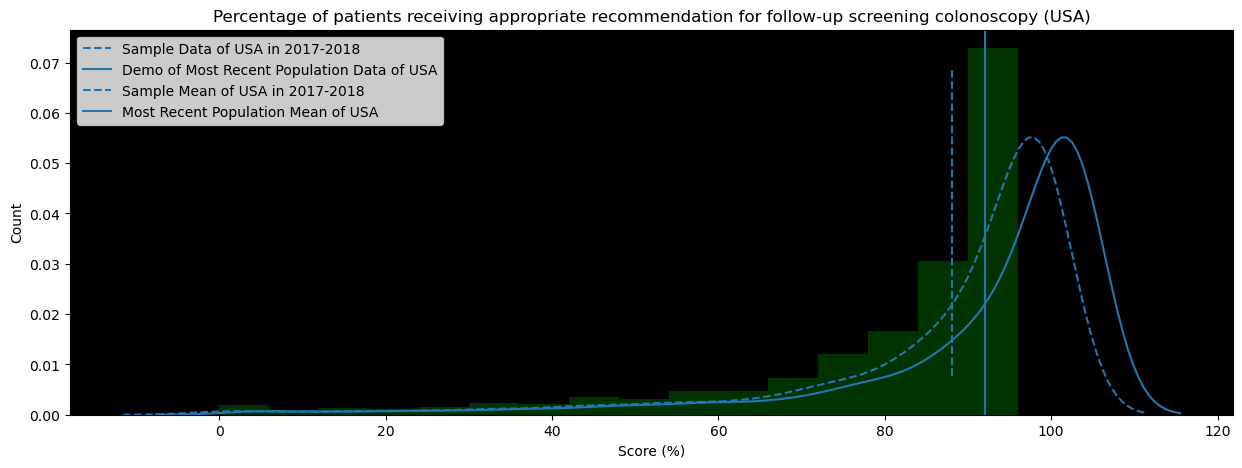

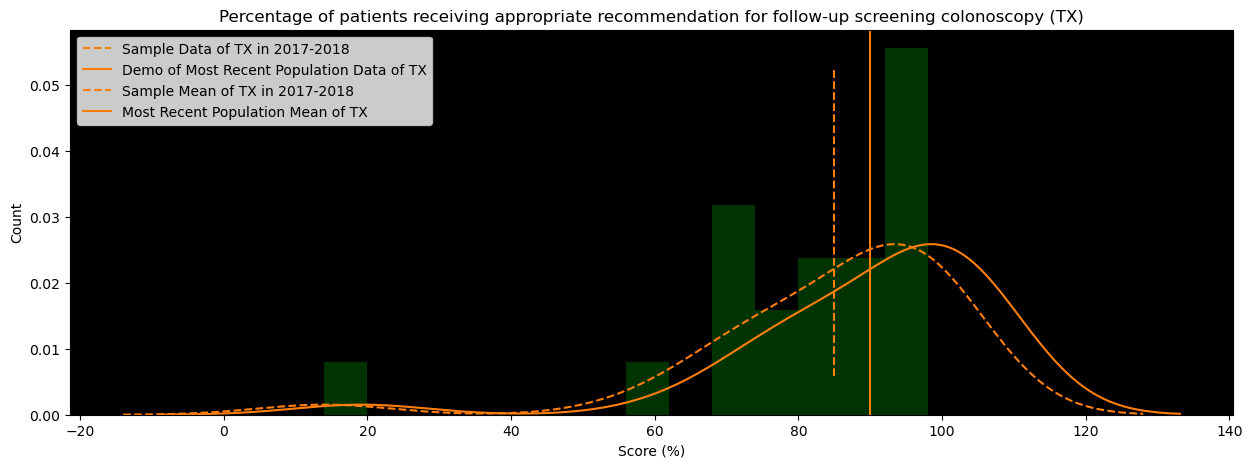

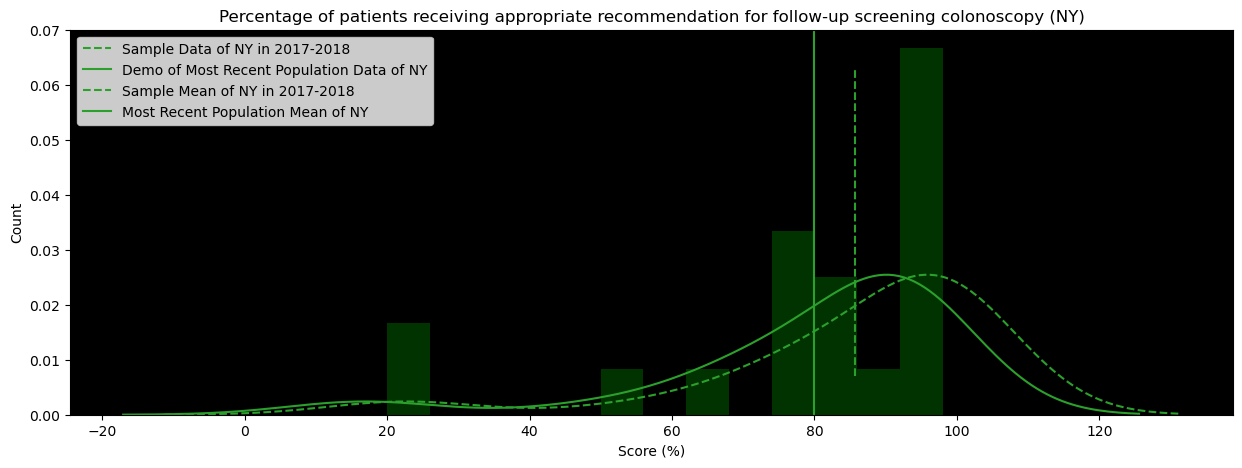

In [108]:
def plot_maker(i):
    fig, ax = plt.subplots(figsize=(15,5))
    bins = range(int(data[i]["Score"].astype(int).min()), int(data[i]["Score"].astype(int).max()), int(data[i]["Score"].astype(int).median())//15)
    ax.hist(
        x=data[i]["Score"],
        bins=bins,
        color="green",
        alpha=.4,
        density=True
    )
    ax.set_facecolor('black')
    colors = sns.color_palette()
    sns.kdeplot(data=data[i], x="Score", color = colors[i], label="Sample Data of " + pop[i] + ' in 2017-2018', linestyle="--")
    sns.kdeplot(data=data[i]+(mu[i]-x_bar[i]), color = colors[i], x="Score", label="Demo of Most Recent Population Data of " + pop[i])
    plt.axvline(x = x_bar[i], ymin = 0.1, ymax = 0.90, color = colors[i], label = 'Sample Mean of ' + pop[i] + ' in 2017-2018', linestyle="--")
    plt.axvline(x = mu[i], color = colors[i], label = 'Most Recent Population Mean of ' + pop[i])
    ax.set_title("Percentage of patients receiving appropriate recommendation for follow-up screening colonoscopy (" +pop[i]+ ")")
    ax.set_xlabel("Score (%)")
    ax.set_ylabel("Count")
    ax.legend();
for i in range(3):
    plot_maker(i)

## Based on the graphs and the p-vaules from our t-test we fail to reject the null hypothesis that  Houston Hospitals and NYC Hospitals have no notable differences in their OP_29 metric aka percentage of patients receiving appropriate recommendation for follow-up screening colonoscopy than their 2017-2018 counterparts

## For USA Hospitals we can reject the null hypothesis in favor of an alternative hypothesis based on the graph.
   -   OP_29 metric aka percentage of patients receiving appropriate recommendation for follow-up screening colonoscopy is higher today at USA Hospitals than in 2017-2018

## Inferential EDA Part 2 New Normal or Same Normal Summary
 - Not much has changed for NYC Hospitals and Houston Hospitals in their timely care metric from today, the post-covid era and 2017-2018, the per-covid area
 - However, USA Hospitals as a whole have experianed many changes in their timely care metric from today, the post-covid era and 2017-2018, the per-covid area

## Summary

### Recommations
 - If you need go the ER, you are better off in Houston than NYC if you want fast care, however, there is not much of a difference in quality
 - As a whole USA Hospital should focus on why ED metrics (wait time, patients leaving without care, Head CTs) have been falling in the post coivd era.
 
### Future Qs
  - Why are Houston Hospitals ED times out-perfroming NYC Hospitals, is bad data, higher pop density, ect?
  - Is high turnover rate with nurses during covid era to blam with the stats falling behind in USA Hospital?
  